In [54]:
import os
import pandas
import numpy as np

import struct
np.random.seed(2018)

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense,Input
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
from keras import regularizers
import keras
%matplotlib inline
xfile1=".\\data\\C1_feature_denoise.csv"
yfile1=".\\data\\c1_wear_new.csv"

xfile2=".\\data\\C4_feature_denoise.csv"
yfile2=".\\data\\c4_wear_new.csv"

xfile3=".\\data\\C6_feature_denoise.csv"
yfile3=".\\data\\c6_wear_new.csv"


x1=pandas.read_csv(xfile1).values;
x2=pandas.read_csv(xfile2).values;
x3=pandas.read_csv(xfile3).values;
y1=pandas.read_csv(yfile1).values[:,-1];
y2=pandas.read_csv(yfile2).values[:,-1];
y3=pandas.read_csv(yfile3).values[:,4];

print(x1.shape,x2.shape,x3.shape,y1.shape,y2.shape,y3.shape);
X_train=np.vstack((x1,x2))
y_train=np.hstack((y1,y2))

print(X_train.shape)
print(y_train.shape)

X_test=x3;
y_test=y3;
print(X_test.shape)
print(y_test.shape)



# 数据预处理
X_train=X_train.astype('float32')/255-0.5 # minmax_normalized(归一化在（-0.5,0.5）)之间
X_test=X_test.astype('float32')/255-0.5 # minmax_normalized
X_train_len=X_train.shape[0]
X_test_len=X_test.shape[0]

X_train=X_train.reshape((X_train_len,-1))
X_test=X_test.reshape((X_test_len,-1))

print(X_train.shape,X_test.shape)


class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch': [], 'epoch': []}
        self.accuracy = {'batch': [], 'epoch': []}
        self.val_loss = {'batch': [], 'epoch': []}
        self.val_acc = {'batch': [], 'epoch': []}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        #创建一个图
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')#plt.plot(x,y)，这个将数据画成曲线
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)#设置网格形式
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')#给x，y轴加注释
        plt.legend(loc="upper right")#设置图例显示位置
        plt.show()

(315, 10) (315, 10) (315, 10) (315,) (315,) (315,)
(630, 10)
(630,)
(315, 10)
(315,)
(630, 10) (315, 10)


Epoch 1/1000
630/630 [==============================] - 1s 2ms/step - loss: 1840462548.8254
Epoch 2/1000
630/630 [==============================] - 0s 40us/step - loss: 1624502670.9841
Epoch 3/1000
630/630 [==============================] - 0s 35us/step - loss: 1454499120.7619
Epoch 4/1000
630/630 [==============================] - 0s 38us/step - loss: 1292059533.2063
Epoch 5/1000
630/630 [==============================] - 0s 38us/step - loss: 1129876419.0476
Epoch 6/1000
630/630 [==============================] - 0s 36us/step - loss: 1003795710.4762
Epoch 7/1000
630/630 [==============================] - 0s 36us/step - loss: 876318293.3333
Epoch 8/1000
630/630 [==============================] - 0s 36us/step - loss: 771306502.6032
Epoch 9/1000
630/630 [==============================] - 0s 38us/step - loss: 686530343.1111
Epoch 10/1000
630/630 [==============================] - 0s 35us/step - loss: 579989943.6190
Epoch 11/1000
630/630 [==============================] - 0s 36us/step - lo

630/630 [==============================] - 0s 33us/step - loss: 143490.7183
Epoch 92/1000
630/630 [==============================] - 0s 35us/step - loss: 139745.6587
Epoch 93/1000
630/630 [==============================] - 0s 33us/step - loss: 141405.3669
Epoch 94/1000
630/630 [==============================] - 0s 33us/step - loss: 142355.9049
Epoch 95/1000
630/630 [==============================] - 0s 33us/step - loss: 144134.5773
Epoch 96/1000
630/630 [==============================] - 0s 32us/step - loss: 144298.8883
Epoch 97/1000
630/630 [==============================] - 0s 35us/step - loss: 140647.6820
Epoch 98/1000
630/630 [==============================] - 0s 33us/step - loss: 139102.7001
Epoch 99/1000
630/630 [==============================] - 0s 32us/step - loss: 136552.3996
Epoch 100/1000
630/630 [==============================] - 0s 33us/step - loss: 144328.1775
Epoch 101/1000
630/630 [==============================] - 0s 35us/step - loss: 140828.6205
Epoch 102/1000
630/630

630/630 [==============================] - 0s 33us/step - loss: 141513.5311
Epoch 182/1000
630/630 [==============================] - 0s 36us/step - loss: 142796.5967
Epoch 183/1000
630/630 [==============================] - 0s 33us/step - loss: 143468.8244
Epoch 184/1000
630/630 [==============================] - 0s 35us/step - loss: 137288.7423
Epoch 185/1000
630/630 [==============================] - 0s 33us/step - loss: 136494.6104
Epoch 186/1000
630/630 [==============================] - 0s 33us/step - loss: 148123.5474
Epoch 187/1000
630/630 [==============================] - 0s 32us/step - loss: 140879.7362
Epoch 188/1000
630/630 [==============================] - 0s 33us/step - loss: 144397.4715
Epoch 189/1000
630/630 [==============================] - 0s 35us/step - loss: 146747.2024
Epoch 190/1000
630/630 [==============================] - 0s 35us/step - loss: 144942.4405
Epoch 191/1000
630/630 [==============================] - 0s 33us/step - loss: 143829.0626
Epoch 192/1000

630/630 [==============================] - 0s 35us/step - loss: 138171.1193
Epoch 272/1000
630/630 [==============================] - 0s 35us/step - loss: 144566.2793
Epoch 273/1000
630/630 [==============================] - 0s 35us/step - loss: 139762.2361
Epoch 274/1000
630/630 [==============================] - 0s 35us/step - loss: 142283.7493
Epoch 275/1000
630/630 [==============================] - 0s 33us/step - loss: 143228.4669
Epoch 276/1000
630/630 [==============================] - 0s 32us/step - loss: 138870.2319
Epoch 277/1000
630/630 [==============================] - 0s 36us/step - loss: 138955.1719
Epoch 278/1000
630/630 [==============================] - 0s 33us/step - loss: 133819.3645
Epoch 279/1000
630/630 [==============================] - 0s 33us/step - loss: 144766.0560
Epoch 280/1000
630/630 [==============================] - 0s 33us/step - loss: 142833.8650
Epoch 281/1000
630/630 [==============================] - 0s 33us/step - loss: 142635.5009
Epoch 282/1000

630/630 [==============================] - 0s 28us/step - loss: 138984.1987
Epoch 362/1000
630/630 [==============================] - 0s 30us/step - loss: 137589.6438
Epoch 363/1000
630/630 [==============================] - 0s 28us/step - loss: 140476.8305
Epoch 364/1000
630/630 [==============================] - 0s 29us/step - loss: 141564.7785
Epoch 365/1000
630/630 [==============================] - 0s 27us/step - loss: 138068.7980
Epoch 366/1000
630/630 [==============================] - 0s 30us/step - loss: 140589.2155
Epoch 367/1000
630/630 [==============================] - 0s 30us/step - loss: 140670.0758
Epoch 368/1000
630/630 [==============================] - 0s 30us/step - loss: 140782.2603
Epoch 369/1000
630/630 [==============================] - 0s 28us/step - loss: 141904.9082
Epoch 370/1000
630/630 [==============================] - 0s 38us/step - loss: 142766.3148
Epoch 371/1000
630/630 [==============================] - 0s 40us/step - loss: 144035.0788
Epoch 372/1000

630/630 [==============================] - 0s 35us/step - loss: 147962.6176
Epoch 452/1000
630/630 [==============================] - 0s 35us/step - loss: 150388.0474
Epoch 453/1000
630/630 [==============================] - 0s 35us/step - loss: 141251.4308
Epoch 454/1000
630/630 [==============================] - 0s 33us/step - loss: 138638.9380
Epoch 455/1000
630/630 [==============================] - 0s 35us/step - loss: 143371.4679
Epoch 456/1000
630/630 [==============================] - 0s 33us/step - loss: 139846.0205
Epoch 457/1000
630/630 [==============================] - 0s 33us/step - loss: 137169.8357
Epoch 458/1000
630/630 [==============================] - 0s 35us/step - loss: 135461.9878
Epoch 459/1000
630/630 [==============================] - 0s 32us/step - loss: 140177.1708
Epoch 460/1000
630/630 [==============================] - 0s 32us/step - loss: 139538.1889
Epoch 461/1000
630/630 [==============================] - 0s 35us/step - loss: 141519.4318
Epoch 462/1000

630/630 [==============================] - 0s 36us/step - loss: 139041.3832
Epoch 542/1000
630/630 [==============================] - 0s 33us/step - loss: 139660.3418
Epoch 543/1000
630/630 [==============================] - 0s 33us/step - loss: 134516.9375
Epoch 544/1000
630/630 [==============================] - 0s 33us/step - loss: 139803.1966
Epoch 545/1000
630/630 [==============================] - 0s 33us/step - loss: 141193.6516
Epoch 546/1000
630/630 [==============================] - 0s 35us/step - loss: 133426.3981
Epoch 547/1000
630/630 [==============================] - 0s 33us/step - loss: 137921.1905
Epoch 548/1000
630/630 [==============================] - 0s 33us/step - loss: 141636.4940
Epoch 549/1000
630/630 [==============================] - 0s 32us/step - loss: 141292.7778
Epoch 550/1000
630/630 [==============================] - 0s 33us/step - loss: 135461.1912
Epoch 551/1000
630/630 [==============================] - 0s 33us/step - loss: 139361.4380
Epoch 552/1000

630/630 [==============================] - 0s 33us/step - loss: 133414.0443
Epoch 632/1000
630/630 [==============================] - 0s 36us/step - loss: 141177.1338
Epoch 633/1000
630/630 [==============================] - 0s 35us/step - loss: 142386.7310
Epoch 634/1000
630/630 [==============================] - 0s 33us/step - loss: 147779.0614
Epoch 635/1000
630/630 [==============================] - 0s 33us/step - loss: 137670.5390
Epoch 636/1000
630/630 [==============================] - 0s 33us/step - loss: 136991.4407
Epoch 637/1000
630/630 [==============================] - 0s 32us/step - loss: 148654.9389
Epoch 638/1000
630/630 [==============================] - 0s 32us/step - loss: 151236.8099
Epoch 639/1000
630/630 [==============================] - 0s 36us/step - loss: 147751.0888
Epoch 640/1000
630/630 [==============================] - 0s 35us/step - loss: 150978.9521
Epoch 641/1000
630/630 [==============================] - 0s 33us/step - loss: 151435.0151
Epoch 642/1000

630/630 [==============================] - 0s 35us/step - loss: 136263.2628
Epoch 722/1000
630/630 [==============================] - 0s 36us/step - loss: 133815.2698
Epoch 723/1000
630/630 [==============================] - 0s 35us/step - loss: 132065.4522
Epoch 724/1000
630/630 [==============================] - 0s 32us/step - loss: 134969.3295
Epoch 725/1000
630/630 [==============================] - 0s 33us/step - loss: 130429.5253
Epoch 726/1000
630/630 [==============================] - 0s 33us/step - loss: 135925.2998
Epoch 727/1000
630/630 [==============================] - 0s 32us/step - loss: 136122.1749
Epoch 728/1000
630/630 [==============================] - ETA: 0s - loss: 91511.929 - 0s 35us/step - loss: 135750.5680
Epoch 729/1000
630/630 [==============================] - 0s 33us/step - loss: 134413.8807
Epoch 730/1000
630/630 [==============================] - 0s 33us/step - loss: 136193.3358
Epoch 731/1000
630/630 [==============================] - 0s 33us/step - loss

630/630 [==============================] - 0s 33us/step - loss: 131233.7006
Epoch 811/1000
630/630 [==============================] - 0s 35us/step - loss: 131001.9436
Epoch 812/1000
630/630 [==============================] - 0s 33us/step - loss: 130026.8216
Epoch 813/1000
630/630 [==============================] - 0s 33us/step - loss: 132377.6390
Epoch 814/1000
630/630 [==============================] - 0s 33us/step - loss: 125909.2686
Epoch 815/1000
630/630 [==============================] - 0s 32us/step - loss: 135877.9208
Epoch 816/1000
630/630 [==============================] - 0s 33us/step - loss: 137189.3163
Epoch 817/1000
630/630 [==============================] - 0s 33us/step - loss: 137457.7397
Epoch 818/1000
630/630 [==============================] - 0s 32us/step - loss: 135463.4968
Epoch 819/1000
630/630 [==============================] - 0s 36us/step - loss: 135290.5571
Epoch 820/1000
630/630 [==============================] - 0s 33us/step - loss: 133976.0071
Epoch 821/1000

630/630 [==============================] - 0s 33us/step - loss: 131352.1551
Epoch 901/1000
630/630 [==============================] - 0s 33us/step - loss: 123176.8057
Epoch 902/1000
630/630 [==============================] - 0s 35us/step - loss: 133077.4494
Epoch 903/1000
630/630 [==============================] - 0s 33us/step - loss: 127214.4325
Epoch 904/1000
630/630 [==============================] - 0s 32us/step - loss: 131441.7186
Epoch 905/1000
630/630 [==============================] - 0s 32us/step - loss: 134847.2292
Epoch 906/1000
630/630 [==============================] - 0s 33us/step - loss: 134551.1618
Epoch 907/1000
630/630 [==============================] - 0s 35us/step - loss: 127860.3220
Epoch 908/1000
630/630 [==============================] - 0s 32us/step - loss: 134574.7224
Epoch 909/1000
630/630 [==============================] - 0s 33us/step - loss: 132556.8483
Epoch 910/1000
630/630 [==============================] - 0s 35us/step - loss: 133721.9341
Epoch 911/1000

630/630 [==============================] - 0s 38us/step - loss: 134309.4760
Epoch 991/1000
630/630 [==============================] - 0s 35us/step - loss: 132715.8960
Epoch 992/1000
630/630 [==============================] - 0s 33us/step - loss: 128616.9164
Epoch 993/1000
630/630 [==============================] - 0s 33us/step - loss: 131885.7882
Epoch 994/1000
630/630 [==============================] - 0s 36us/step - loss: 125387.6868
Epoch 995/1000
630/630 [==============================] - 0s 35us/step - loss: 130433.9091
Epoch 996/1000
630/630 [==============================] - 0s 36us/step - loss: 131118.7843
Epoch 997/1000
630/630 [==============================] - 0s 32us/step - loss: 125563.1535
Epoch 998/1000
630/630 [==============================] - 0s 33us/step - loss: 124543.5389
Epoch 999/1000
630/630 [==============================] - 0s 35us/step - loss: 126468.9269
Epoch 1000/1000
630/630 [==============================] - 0s 35us/step - loss: 130501.0525


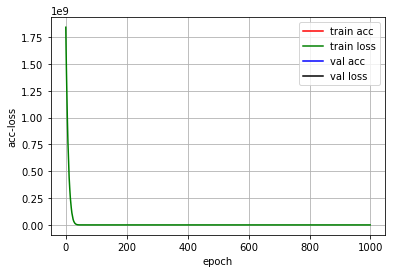

In [59]:
history1 = LossHistory()
input_img=Input(shape=(10,))
# 编码层
#encoded=Dense(128,activation='relu',name='encoded_hidden1',activity_regularizer=regularizers.l1(0.01))(input_img)
#encoded=Dense(64,activation='sigmoid',name='encoded_hidden2',activity_regularizer=regularizers.l1(0.01))(encoded)
#encoded=Dense(32,activation='sigmoid',name='encoded_hidden3',activity_regularizer=regularizers.l1(0.01))(encoded)
#encoder_output=Dense(16,activation='relu',name='encoded_hidden4',activity_regularizer=regularizers.l1(0.01))(encoded)
LR=Dense(20,name='LR',activity_regularizer=regularizers.l1(0.01))(input_img)

# 解码层
decoded=Dense(10,name='decoded_hidden2')(LR)
#decoded=Dense(32,activation='sigmoid',name='decoded_hidden3',activity_regularizer=regularizers.l1(0.01))(decoded)
#decoded=Dense(64,activation='sigmoid',name='decoded_hidden4',activity_regularizer=regularizers.l1(0.01))(decoded)
#decoded=Dense(128,activation='sigmoid',name='decoded_hidden5',activity_regularizer=regularizers.l1(0.01))(decoded)
#decoded=Dense(10,activation='sigmoid',name='decoded_output')(decoded)

# 构建自编码模型
autoencoder=Model(inputs=input_img,outputs=decoded)

# complile autoencoder 设置自编码的优化参数
autoencoder.compile(optimizer='adam',loss='mse')
# train
hist=autoencoder.fit(X_train,X_train,epochs=1000,batch_size=100,shuffle=True,callbacks=[history1])
history1.loss_plot('epoch')

Train on 630 samples, validate on 315 samples
Epoch 1/10000
630/630 [==============================] - 1s 2ms/step - loss: 335657.7929 - val_loss: 161408.1616
Epoch 2/10000
630/630 [==============================] - 0s 59us/step - loss: 268570.6192 - val_loss: 132996.7973
Epoch 3/10000
630/630 [==============================] - 0s 59us/step - loss: 218816.6656 - val_loss: 111257.9630
Epoch 4/10000
630/630 [==============================] - 0s 60us/step - loss: 181043.5163 - val_loss: 95847.5689
Epoch 5/10000
630/630 [==============================] - 0s 57us/step - loss: 152624.7085 - val_loss: 85730.5957
Epoch 6/10000
630/630 [==============================] - 0s 57us/step - loss: 136224.5668 - val_loss: 79555.5846
Epoch 7/10000
630/630 [==============================] - 0s 57us/step - loss: 124604.4033 - val_loss: 75364.8170
Epoch 8/10000
630/630 [==============================] - 0s 59us/step - loss: 118032.2580 - val_loss: 73312.8266
Epoch 9/10000
630/630 [=========================

630/630 [==============================] - 0s 59us/step - loss: 17264.5923 - val_loss: 19767.0864
Epoch 74/10000
630/630 [==============================] - 0s 54us/step - loss: 16604.7747 - val_loss: 19512.7879
Epoch 75/10000
630/630 [==============================] - 0s 52us/step - loss: 16327.4568 - val_loss: 19288.0270
Epoch 76/10000
630/630 [==============================] - 0s 54us/step - loss: 16014.3497 - val_loss: 19097.4819
Epoch 77/10000
630/630 [==============================] - 0s 55us/step - loss: 15499.0872 - val_loss: 18831.4882
Epoch 78/10000
630/630 [==============================] - 0s 55us/step - loss: 15285.5811 - val_loss: 18658.5847
Epoch 79/10000
630/630 [==============================] - 0s 52us/step - loss: 14884.6278 - val_loss: 18446.0740
Epoch 80/10000
630/630 [==============================] - 0s 52us/step - loss: 14422.1267 - val_loss: 18242.7097
Epoch 81/10000
630/630 [==============================] - 0s 52us/step - loss: 14112.1964 - val_loss: 18082.372

630/630 [==============================] - 0s 59us/step - loss: 9686.2888 - val_loss: 15018.9350
Epoch 146/10000
630/630 [==============================] - 0s 54us/step - loss: 9694.4027 - val_loss: 15019.3226
Epoch 147/10000
630/630 [==============================] - 0s 54us/step - loss: 9689.7180 - val_loss: 15013.2999
Epoch 148/10000
630/630 [==============================] - 0s 54us/step - loss: 9924.9047 - val_loss: 15195.4199
Epoch 149/10000
630/630 [==============================] - 0s 55us/step - loss: 9967.6708 - val_loss: 15056.3524
Epoch 150/10000
630/630 [==============================] - 0s 52us/step - loss: 9797.6447 - val_loss: 14973.3698
Epoch 151/10000
630/630 [==============================] - 0s 52us/step - loss: 9643.3107 - val_loss: 14947.2338
Epoch 152/10000
630/630 [==============================] - 0s 55us/step - loss: 9608.7488 - val_loss: 14859.6823
Epoch 153/10000
630/630 [==============================] - 0s 55us/step - loss: 9556.6054 - val_loss: 14860.1430

630/630 [==============================] - 0s 55us/step - loss: 8375.7817 - val_loss: 13490.5147
Epoch 218/10000
630/630 [==============================] - 0s 54us/step - loss: 8338.9091 - val_loss: 13448.7583
Epoch 219/10000
630/630 [==============================] - 0s 51us/step - loss: 8308.0555 - val_loss: 13424.8578
Epoch 220/10000
630/630 [==============================] - 0s 54us/step - loss: 8275.9182 - val_loss: 13417.2695
Epoch 221/10000
630/630 [==============================] - 0s 52us/step - loss: 8247.0282 - val_loss: 13389.1532
Epoch 222/10000
630/630 [==============================] - 0s 54us/step - loss: 8240.1863 - val_loss: 13368.5706
Epoch 223/10000
630/630 [==============================] - 0s 52us/step - loss: 8224.6119 - val_loss: 13349.0790
Epoch 224/10000
630/630 [==============================] - 0s 57us/step - loss: 8212.0538 - val_loss: 13326.0473
Epoch 225/10000
630/630 [==============================] - 0s 55us/step - loss: 8190.0676 - val_loss: 13309.6235

630/630 [==============================] - 0s 54us/step - loss: 7133.6591 - val_loss: 11801.9583
Epoch 290/10000
630/630 [==============================] - 0s 55us/step - loss: 7007.9896 - val_loss: 11725.3276
Epoch 291/10000
630/630 [==============================] - 0s 51us/step - loss: 6944.8166 - val_loss: 11698.8873
Epoch 292/10000
630/630 [==============================] - 0s 55us/step - loss: 6918.2542 - val_loss: 11696.7540
Epoch 293/10000
630/630 [==============================] - 0s 54us/step - loss: 6903.1251 - val_loss: 11710.9668
Epoch 294/10000
630/630 [==============================] - 0s 52us/step - loss: 6918.1283 - val_loss: 11649.7016
Epoch 295/10000
630/630 [==============================] - 0s 51us/step - loss: 6875.0130 - val_loss: 11651.2348
Epoch 296/10000
630/630 [==============================] - 0s 51us/step - loss: 6881.8351 - val_loss: 11588.7706
Epoch 297/10000
630/630 [==============================] - 0s 52us/step - loss: 6820.9017 - val_loss: 11571.8229

630/630 [==============================] - 0s 54us/step - loss: 5943.8478 - val_loss: 10402.4600
Epoch 362/10000
630/630 [==============================] - 0s 54us/step - loss: 5939.2890 - val_loss: 10443.5331
Epoch 363/10000
630/630 [==============================] - 0s 52us/step - loss: 6078.8733 - val_loss: 10411.9597
Epoch 364/10000
630/630 [==============================] - 0s 52us/step - loss: 5958.7434 - val_loss: 10389.3304
Epoch 365/10000
630/630 [==============================] - 0s 52us/step - loss: 5932.6726 - val_loss: 10346.2790
Epoch 366/10000
630/630 [==============================] - 0s 52us/step - loss: 5898.5623 - val_loss: 10311.4771
Epoch 367/10000
630/630 [==============================] - 0s 54us/step - loss: 5864.1769 - val_loss: 10296.9633
Epoch 368/10000
630/630 [==============================] - 0s 57us/step - loss: 5842.0914 - val_loss: 10302.6603
Epoch 369/10000
630/630 [==============================] - 0s 54us/step - loss: 5859.8496 - val_loss: 10281.2109

630/630 [==============================] - 0s 54us/step - loss: 4986.7744 - val_loss: 9065.5106
Epoch 435/10000
630/630 [==============================] - 0s 52us/step - loss: 4952.6775 - val_loss: 9047.3980
Epoch 436/10000
630/630 [==============================] - 0s 55us/step - loss: 4936.8171 - val_loss: 9039.2518
Epoch 437/10000
630/630 [==============================] - 0s 54us/step - loss: 4929.4716 - val_loss: 9026.6669
Epoch 438/10000
630/630 [==============================] - 0s 52us/step - loss: 4922.9063 - val_loss: 9026.6976
Epoch 439/10000
630/630 [==============================] - 0s 52us/step - loss: 4926.9951 - val_loss: 8995.8207
Epoch 440/10000
630/630 [==============================] - 0s 52us/step - loss: 4896.0291 - val_loss: 8972.6308
Epoch 441/10000
630/630 [==============================] - 0s 52us/step - loss: 4878.3532 - val_loss: 8948.4786
Epoch 442/10000
630/630 [==============================] - 0s 52us/step - loss: 4863.9938 - val_loss: 8933.2672
Epoch 44

630/630 [==============================] - 0s 55us/step - loss: 4258.8742 - val_loss: 7969.6150
Epoch 508/10000
630/630 [==============================] - 0s 54us/step - loss: 4198.1911 - val_loss: 7924.9260
Epoch 509/10000
630/630 [==============================] - 0s 54us/step - loss: 4159.1976 - val_loss: 7909.1873
Epoch 510/10000
630/630 [==============================] - 0s 54us/step - loss: 4137.6045 - val_loss: 7911.9450
Epoch 511/10000
630/630 [==============================] - 0s 52us/step - loss: 4150.2930 - val_loss: 7909.1810
Epoch 512/10000
630/630 [==============================] - 0s 52us/step - loss: 4209.5765 - val_loss: 7915.8514
Epoch 513/10000
630/630 [==============================] - 0s 55us/step - loss: 4174.0691 - val_loss: 7862.0403
Epoch 514/10000
630/630 [==============================] - 0s 57us/step - loss: 4113.9172 - val_loss: 7836.3736
Epoch 515/10000
630/630 [==============================] - 0s 54us/step - loss: 4094.1477 - val_loss: 7839.1925
Epoch 51

630/630 [==============================] - 0s 54us/step - loss: 3526.7411 - val_loss: 6964.3414
Epoch 581/10000
630/630 [==============================] - 0s 54us/step - loss: 3499.3815 - val_loss: 6965.1181
Epoch 582/10000
630/630 [==============================] - 0s 54us/step - loss: 3526.4943 - val_loss: 6971.9969
Epoch 583/10000
630/630 [==============================] - 0s 52us/step - loss: 3519.1823 - val_loss: 6953.0071
Epoch 584/10000
630/630 [==============================] - 0s 52us/step - loss: 3601.6737 - val_loss: 6999.5763
Epoch 585/10000
630/630 [==============================] - 0s 52us/step - loss: 3577.1086 - val_loss: 6941.0399
Epoch 586/10000
630/630 [==============================] - 0s 52us/step - loss: 3511.2504 - val_loss: 6900.9592
Epoch 587/10000
630/630 [==============================] - 0s 54us/step - loss: 3470.4088 - val_loss: 6885.9366
Epoch 588/10000
630/630 [==============================] - 0s 55us/step - loss: 3460.9130 - val_loss: 6895.7694
Epoch 58

630/630 [==============================] - 0s 51us/step - loss: 3031.7241 - val_loss: 6157.5793
Epoch 654/10000
630/630 [==============================] - 0s 54us/step - loss: 3019.7607 - val_loss: 6123.8846
Epoch 655/10000
630/630 [==============================] - 0s 52us/step - loss: 2984.7531 - val_loss: 6117.4570
Epoch 656/10000
630/630 [==============================] - 0s 52us/step - loss: 2989.2287 - val_loss: 6235.7332
Epoch 657/10000
630/630 [==============================] - 0s 51us/step - loss: 3306.6860 - val_loss: 6268.2763
Epoch 658/10000
630/630 [==============================] - 0s 55us/step - loss: 3242.6799 - val_loss: 6151.6576
Epoch 659/10000
630/630 [==============================] - 0s 55us/step - loss: 3073.5166 - val_loss: 6103.4197
Epoch 660/10000
630/630 [==============================] - 0s 52us/step - loss: 3020.1172 - val_loss: 6109.7945
Epoch 661/10000
630/630 [==============================] - 0s 52us/step - loss: 2996.2779 - val_loss: 6125.6589
Epoch 66

630/630 [==============================] - 0s 54us/step - loss: 2525.4757 - val_loss: 5399.2345
Epoch 727/10000
630/630 [==============================] - 0s 55us/step - loss: 2522.8794 - val_loss: 5434.8125
Epoch 728/10000
630/630 [==============================] - 0s 54us/step - loss: 2602.8975 - val_loss: 5425.8122
Epoch 729/10000
630/630 [==============================] - 0s 54us/step - loss: 2567.7138 - val_loss: 5397.6355
Epoch 730/10000
630/630 [==============================] - 0s 52us/step - loss: 2537.1092 - val_loss: 5350.3569
Epoch 731/10000
630/630 [==============================] - 0s 52us/step - loss: 2509.8219 - val_loss: 5390.9758
Epoch 732/10000
630/630 [==============================] - 0s 52us/step - loss: 2614.9991 - val_loss: 5416.3850
Epoch 733/10000
630/630 [==============================] - 0s 52us/step - loss: 2594.8903 - val_loss: 5360.5697
Epoch 734/10000
630/630 [==============================] - 0s 52us/step - loss: 2521.9292 - val_loss: 5364.9324
Epoch 73

630/630 [==============================] - 0s 52us/step - loss: 2245.6118 - val_loss: 4787.0679
Epoch 800/10000
630/630 [==============================] - 0s 57us/step - loss: 2215.6440 - val_loss: 4786.3345
Epoch 801/10000
630/630 [==============================] - 0s 54us/step - loss: 2215.9422 - val_loss: 4806.8895
Epoch 802/10000
630/630 [==============================] - 0s 51us/step - loss: 2225.4869 - val_loss: 4764.4692
Epoch 803/10000
630/630 [==============================] - 0s 57us/step - loss: 2184.4679 - val_loss: 4775.8053
Epoch 804/10000
630/630 [==============================] - 0s 54us/step - loss: 2299.1833 - val_loss: 4828.8204
Epoch 805/10000
630/630 [==============================] - 0s 54us/step - loss: 2291.2299 - val_loss: 4767.4642
Epoch 806/10000
630/630 [==============================] - 0s 54us/step - loss: 2248.3504 - val_loss: 4734.8321
Epoch 807/10000
630/630 [==============================] - 0s 54us/step - loss: 2177.0457 - val_loss: 4704.4220
Epoch 80

630/630 [==============================] - 0s 54us/step - loss: 1911.0632 - val_loss: 4213.0854
Epoch 873/10000
630/630 [==============================] - 0s 52us/step - loss: 1886.3250 - val_loss: 4199.3243
Epoch 874/10000
630/630 [==============================] - 0s 52us/step - loss: 1870.6652 - val_loss: 4223.5255
Epoch 875/10000
630/630 [==============================] - 0s 54us/step - loss: 1908.0066 - val_loss: 4203.4874
Epoch 876/10000
630/630 [==============================] - 0s 52us/step - loss: 1942.5000 - val_loss: 4202.7477
Epoch 877/10000
630/630 [==============================] - 0s 52us/step - loss: 1898.6894 - val_loss: 4214.3601
Epoch 878/10000
630/630 [==============================] - 0s 52us/step - loss: 1908.2974 - val_loss: 4187.1930
Epoch 879/10000
630/630 [==============================] - 0s 51us/step - loss: 1898.3148 - val_loss: 4167.2202
Epoch 880/10000
630/630 [==============================] - 0s 51us/step - loss: 1868.2523 - val_loss: 4173.1279
Epoch 88

630/630 [==============================] - 0s 54us/step - loss: 1694.1952 - val_loss: 3754.5307
Epoch 946/10000
630/630 [==============================] - 0s 57us/step - loss: 1678.0835 - val_loss: 3763.2060
Epoch 947/10000
630/630 [==============================] - 0s 57us/step - loss: 1676.5178 - val_loss: 3741.6764
Epoch 948/10000
630/630 [==============================] - 0s 54us/step - loss: 1664.6258 - val_loss: 3754.8121
Epoch 949/10000
630/630 [==============================] - 0s 51us/step - loss: 1689.4847 - val_loss: 3746.7873
Epoch 950/10000
630/630 [==============================] - 0s 54us/step - loss: 1676.5835 - val_loss: 3735.3299
Epoch 951/10000
630/630 [==============================] - 0s 52us/step - loss: 1666.1802 - val_loss: 3737.9067
Epoch 952/10000
630/630 [==============================] - 0s 52us/step - loss: 1691.3850 - val_loss: 3738.1181
Epoch 953/10000
630/630 [==============================] - 0s 54us/step - loss: 1687.9228 - val_loss: 3723.9699
Epoch 95

630/630 [==============================] - 0s 55us/step - loss: 1548.5984 - val_loss: 3397.3972
Epoch 1019/10000
630/630 [==============================] - 0s 52us/step - loss: 1598.5529 - val_loss: 3412.6576
Epoch 1020/10000
630/630 [==============================] - 0s 52us/step - loss: 1576.5970 - val_loss: 3402.1842
Epoch 1021/10000
630/630 [==============================] - 0s 52us/step - loss: 1559.4460 - val_loss: 3382.2467
Epoch 1022/10000
630/630 [==============================] - 0s 54us/step - loss: 1532.9075 - val_loss: 3370.9610
Epoch 1023/10000
630/630 [==============================] - 0s 52us/step - loss: 1509.4204 - val_loss: 3365.8108
Epoch 1024/10000
630/630 [==============================] - 0s 54us/step - loss: 1520.9809 - val_loss: 3355.2818
Epoch 1025/10000
630/630 [==============================] - 0s 59us/step - loss: 1526.7473 - val_loss: 3362.7624
Epoch 1026/10000
630/630 [==============================] - 0s 71us/step - loss: 1550.3457 - val_loss: 3551.8345


630/630 [==============================] - 0s 57us/step - loss: 1471.2665 - val_loss: 3145.8078
Epoch 1091/10000
630/630 [==============================] - ETA: 0s - loss: 1517.26 - 0s 57us/step - loss: 1449.8281 - val_loss: 3131.3870
Epoch 1092/10000
630/630 [==============================] - 0s 55us/step - loss: 1429.8447 - val_loss: 3129.5097
Epoch 1093/10000
630/630 [==============================] - 0s 52us/step - loss: 1433.7615 - val_loss: 3159.1198
Epoch 1094/10000
630/630 [==============================] - 0s 52us/step - loss: 1504.1440 - val_loss: 3136.7535
Epoch 1095/10000
630/630 [==============================] - 0s 54us/step - loss: 1435.1367 - val_loss: 3124.9740
Epoch 1096/10000
630/630 [==============================] - 0s 55us/step - loss: 1422.5512 - val_loss: 3136.4211
Epoch 1097/10000
630/630 [==============================] - 0s 57us/step - loss: 1406.4036 - val_loss: 3118.9459
Epoch 1098/10000
630/630 [==============================] - 0s 55us/step - loss: 1370.3

630/630 [==============================] - 0s 55us/step - loss: 1706.7048 - val_loss: 2955.6489
Epoch 1163/10000
630/630 [==============================] - 0s 54us/step - loss: 1478.1519 - val_loss: 2807.4860
Epoch 1164/10000
630/630 [==============================] - 0s 55us/step - loss: 1313.4974 - val_loss: 2810.7689
Epoch 1165/10000
630/630 [==============================] - 0s 55us/step - loss: 1281.8438 - val_loss: 2764.9663
Epoch 1166/10000
630/630 [==============================] - 0s 52us/step - loss: 1200.5513 - val_loss: 2746.7982
Epoch 1167/10000
630/630 [==============================] - 0s 54us/step - loss: 1162.5947 - val_loss: 2725.2324
Epoch 1168/10000
630/630 [==============================] - 0s 54us/step - loss: 1125.0007 - val_loss: 2696.6789
Epoch 1169/10000
630/630 [==============================] - 0s 52us/step - loss: 3562.7057 - val_loss: 4878.1669
Epoch 1170/10000
630/630 [==============================] - 0s 52us/step - loss: 5528.9442 - val_loss: 4922.1918


630/630 [==============================] - 0s 60us/step - loss: 1013.0547 - val_loss: 2408.6816
Epoch 1235/10000
630/630 [==============================] - 0s 55us/step - loss: 998.0909 - val_loss: 2414.7712
Epoch 1236/10000
630/630 [==============================] - 0s 55us/step - loss: 1085.2422 - val_loss: 2433.2174
Epoch 1237/10000
630/630 [==============================] - 0s 52us/step - loss: 1141.3891 - val_loss: 2816.3984
Epoch 1238/10000
630/630 [==============================] - 0s 52us/step - loss: 2215.2677 - val_loss: 2964.2594
Epoch 1239/10000
630/630 [==============================] - 0s 55us/step - loss: 2131.9176 - val_loss: 2785.7209
Epoch 1240/10000
630/630 [==============================] - 0s 51us/step - loss: 1711.1932 - val_loss: 2649.9347
Epoch 1241/10000
630/630 [==============================] - 0s 55us/step - loss: 1354.9623 - val_loss: 2514.8776
Epoch 1242/10000
630/630 [==============================] - 0s 52us/step - loss: 1102.6092 - val_loss: 2416.8152
E

Epoch 1307/10000
630/630 [==============================] - 0s 55us/step - loss: 875.4968 - val_loss: 2155.6635
Epoch 1308/10000
630/630 [==============================] - 0s 52us/step - loss: 864.1360 - val_loss: 2149.1276
Epoch 1309/10000
630/630 [==============================] - 0s 51us/step - loss: 846.3179 - val_loss: 2134.4746
Epoch 1310/10000
630/630 [==============================] - 0s 52us/step - loss: 832.9491 - val_loss: 2134.2793
Epoch 1311/10000
630/630 [==============================] - 0s 54us/step - loss: 834.7491 - val_loss: 2115.0053
Epoch 1312/10000
630/630 [==============================] - 0s 52us/step - loss: 830.7790 - val_loss: 2124.0651
Epoch 1313/10000
630/630 [==============================] - 0s 54us/step - loss: 878.8269 - val_loss: 2184.0912
Epoch 1314/10000
630/630 [==============================] - 0s 54us/step - loss: 1110.9351 - val_loss: 2191.7898
Epoch 1315/10000
630/630 [==============================] - 0s 52us/step - loss: 1014.7786 - val_loss: 

Epoch 1380/10000
630/630 [==============================] - 0s 54us/step - loss: 919.1882 - val_loss: 2002.4800
Epoch 1381/10000
630/630 [==============================] - 0s 55us/step - loss: 833.3154 - val_loss: 1999.1781
Epoch 1382/10000
630/630 [==============================] - 0s 54us/step - loss: 836.9373 - val_loss: 1939.5712
Epoch 1383/10000
630/630 [==============================] - 0s 52us/step - loss: 802.8212 - val_loss: 2011.7353
Epoch 1384/10000
630/630 [==============================] - 0s 54us/step - loss: 834.4451 - val_loss: 1926.3594
Epoch 1385/10000
630/630 [==============================] - 0s 57us/step - loss: 810.0001 - val_loss: 1977.9680
Epoch 1386/10000
630/630 [==============================] - 0s 60us/step - loss: 777.4543 - val_loss: 1954.1444
Epoch 1387/10000
630/630 [==============================] - 0s 59us/step - loss: 768.1411 - val_loss: 1910.3837
Epoch 1388/10000
630/630 [==============================] - 0s 59us/step - loss: 824.3591 - val_loss: 20

Epoch 1453/10000
630/630 [==============================] - 0s 52us/step - loss: 1313.1670 - val_loss: 2118.4235
Epoch 1454/10000
630/630 [==============================] - 0s 52us/step - loss: 1204.2432 - val_loss: 2072.5814
Epoch 1455/10000
630/630 [==============================] - 0s 52us/step - loss: 1113.0620 - val_loss: 2042.6588
Epoch 1456/10000
630/630 [==============================] - 0s 52us/step - loss: 1122.8935 - val_loss: 2181.3559
Epoch 1457/10000
630/630 [==============================] - 0s 52us/step - loss: 2029.1910 - val_loss: 2431.5604
Epoch 1458/10000
630/630 [==============================] - 0s 54us/step - loss: 2266.4641 - val_loss: 2360.0925
Epoch 1459/10000
630/630 [==============================] - 0s 52us/step - loss: 1943.3668 - val_loss: 2218.0606
Epoch 1460/10000
630/630 [==============================] - 0s 54us/step - loss: 1587.7303 - val_loss: 2076.3892
Epoch 1461/10000
630/630 [==============================] - 0s 54us/step - loss: 1221.9565 - val

Epoch 1526/10000
630/630 [==============================] - 0s 52us/step - loss: 747.1090 - val_loss: 1656.5400
Epoch 1527/10000
630/630 [==============================] - 0s 52us/step - loss: 712.9502 - val_loss: 1706.7433
Epoch 1528/10000
630/630 [==============================] - 0s 52us/step - loss: 687.4902 - val_loss: 1663.0646
Epoch 1529/10000
630/630 [==============================] - 0s 54us/step - loss: 759.5310 - val_loss: 1664.7754
Epoch 1530/10000
630/630 [==============================] - 0s 51us/step - loss: 706.4124 - val_loss: 1666.4743
Epoch 1531/10000
630/630 [==============================] - 0s 57us/step - loss: 793.5418 - val_loss: 1686.4645
Epoch 1532/10000
630/630 [==============================] - 0s 52us/step - loss: 746.5427 - val_loss: 1663.5090
Epoch 1533/10000
630/630 [==============================] - 0s 54us/step - loss: 873.6619 - val_loss: 1658.3930
Epoch 1534/10000
630/630 [==============================] - 0s 52us/step - loss: 828.0108 - val_loss: 16

Epoch 1599/10000
630/630 [==============================] - 0s 55us/step - loss: 749.3267 - val_loss: 1657.0372
Epoch 1600/10000
630/630 [==============================] - 0s 52us/step - loss: 702.6608 - val_loss: 1639.6045
Epoch 1601/10000
630/630 [==============================] - 0s 55us/step - loss: 690.1206 - val_loss: 1549.0023
Epoch 1602/10000
630/630 [==============================] - 0s 52us/step - loss: 681.2580 - val_loss: 2149.6354
Epoch 1603/10000
630/630 [==============================] - 0s 52us/step - loss: 951.8955 - val_loss: 1631.4732
Epoch 1604/10000
630/630 [==============================] - 0s 54us/step - loss: 1166.8170 - val_loss: 1632.0066
Epoch 1605/10000
630/630 [==============================] - 0s 54us/step - loss: 1055.6829 - val_loss: 1590.7809
Epoch 1606/10000
630/630 [==============================] - 0s 57us/step - loss: 896.6838 - val_loss: 1646.7031
Epoch 1607/10000
630/630 [==============================] - 0s 54us/step - loss: 800.4044 - val_loss: 

630/630 [==============================] - 0s 52us/step - loss: 756.5658 - val_loss: 1596.6453
Epoch 1673/10000
630/630 [==============================] - 0s 54us/step - loss: 660.1036 - val_loss: 1609.0306
Epoch 1674/10000
630/630 [==============================] - 0s 52us/step - loss: 569.9614 - val_loss: 1520.0181
Epoch 1675/10000
630/630 [==============================] - 0s 54us/step - loss: 629.3815 - val_loss: 1534.9940
Epoch 1676/10000
630/630 [==============================] - 0s 54us/step - loss: 671.7386 - val_loss: 1471.2583
Epoch 1677/10000
630/630 [==============================] - 0s 54us/step - loss: 621.1662 - val_loss: 1725.4039
Epoch 1678/10000
630/630 [==============================] - 0s 54us/step - loss: 819.4767 - val_loss: 1412.3866
Epoch 1679/10000
630/630 [==============================] - 0s 54us/step - loss: 821.1811 - val_loss: 1448.4398
Epoch 1680/10000
630/630 [==============================] - 0s 54us/step - loss: 686.8528 - val_loss: 1490.3942
Epoch 168

630/630 [==============================] - 0s 55us/step - loss: 927.5404 - val_loss: 1486.6665
Epoch 1746/10000
630/630 [==============================] - 0s 55us/step - loss: 794.4610 - val_loss: 1380.2504
Epoch 1747/10000
630/630 [==============================] - 0s 51us/step - loss: 689.0024 - val_loss: 1412.1120
Epoch 1748/10000
630/630 [==============================] - 0s 55us/step - loss: 634.7070 - val_loss: 1822.6190
Epoch 1749/10000
630/630 [==============================] - 0s 54us/step - loss: 620.7092 - val_loss: 1473.7975
Epoch 1750/10000
630/630 [==============================] - 0s 54us/step - loss: 691.8714 - val_loss: 1426.4539
Epoch 1751/10000
630/630 [==============================] - 0s 52us/step - loss: 907.4941 - val_loss: 1361.4265
Epoch 1752/10000
630/630 [==============================] - 0s 55us/step - loss: 740.4650 - val_loss: 1377.4327
Epoch 1753/10000
630/630 [==============================] - 0s 51us/step - loss: 631.6100 - val_loss: 1415.1625
Epoch 175

630/630 [==============================] - 0s 52us/step - loss: 647.0997 - val_loss: 1429.6490
Epoch 1819/10000
630/630 [==============================] - 0s 54us/step - loss: 585.2284 - val_loss: 1678.5082
Epoch 1820/10000
630/630 [==============================] - 0s 52us/step - loss: 675.8385 - val_loss: 1250.1701
Epoch 1821/10000
630/630 [==============================] - 0s 54us/step - loss: 672.7041 - val_loss: 1511.1714
Epoch 1822/10000
630/630 [==============================] - 0s 54us/step - loss: 597.2521 - val_loss: 1655.3341
Epoch 1823/10000
630/630 [==============================] - 0s 55us/step - loss: 1028.7641 - val_loss: 1345.4369
Epoch 1824/10000
630/630 [==============================] - 0s 55us/step - loss: 912.0715 - val_loss: 1363.2223
Epoch 1825/10000
630/630 [==============================] - 0s 54us/step - loss: 773.5208 - val_loss: 1290.1631
Epoch 1826/10000
630/630 [==============================] - 0s 54us/step - loss: 725.5224 - val_loss: 1589.8648
Epoch 18

630/630 [==============================] - 0s 62us/step - loss: 838.9107 - val_loss: 1339.5938
Epoch 1892/10000
630/630 [==============================] - 0s 55us/step - loss: 729.2524 - val_loss: 1368.2112
Epoch 1893/10000
630/630 [==============================] - 0s 52us/step - loss: 828.8467 - val_loss: 1687.1873
Epoch 1894/10000
630/630 [==============================] - 0s 52us/step - loss: 759.8410 - val_loss: 1286.9045
Epoch 1895/10000
630/630 [==============================] - 0s 54us/step - loss: 678.8553 - val_loss: 1247.4745
Epoch 1896/10000
630/630 [==============================] - 0s 52us/step - loss: 862.4874 - val_loss: 1312.0122
Epoch 1897/10000
630/630 [==============================] - 0s 52us/step - loss: 866.8955 - val_loss: 1317.3505
Epoch 1898/10000
630/630 [==============================] - 0s 54us/step - loss: 2230.7640 - val_loss: 2477.1635
Epoch 1899/10000
630/630 [==============================] - 0s 54us/step - loss: 3607.6727 - val_loss: 2554.3618
Epoch 1

Epoch 1964/10000
630/630 [==============================] - 0s 52us/step - loss: 1038.2440 - val_loss: 1277.8416
Epoch 1965/10000
630/630 [==============================] - 0s 54us/step - loss: 877.2394 - val_loss: 1212.1109
Epoch 1966/10000
630/630 [==============================] - 0s 52us/step - loss: 697.1524 - val_loss: 1225.6334
Epoch 1967/10000
630/630 [==============================] - 0s 52us/step - loss: 609.1292 - val_loss: 1190.0676
Epoch 1968/10000
630/630 [==============================] - 0s 52us/step - loss: 536.7992 - val_loss: 1221.3201
Epoch 1969/10000
630/630 [==============================] - 0s 54us/step - loss: 499.4360 - val_loss: 1242.9254
Epoch 1970/10000
630/630 [==============================] - 0s 54us/step - loss: 494.6035 - val_loss: 1388.8516
Epoch 1971/10000
630/630 [==============================] - 0s 52us/step - loss: 484.8286 - val_loss: 1222.3486
Epoch 1972/10000
630/630 [==============================] - 0s 54us/step - loss: 517.8550 - val_loss: 1

630/630 [==============================] - 0s 55us/step - loss: 1120.8007 - val_loss: 1575.5956
Epoch 2038/10000
630/630 [==============================] - 0s 54us/step - loss: 1160.5735 - val_loss: 1397.5205
Epoch 2039/10000
630/630 [==============================] - 0s 52us/step - loss: 766.4489 - val_loss: 1343.9675
Epoch 2040/10000
630/630 [==============================] - 0s 54us/step - loss: 792.7764 - val_loss: 1113.6497
Epoch 2041/10000
630/630 [==============================] - 0s 52us/step - loss: 851.9190 - val_loss: 1318.1279
Epoch 2042/10000
630/630 [==============================] - 0s 55us/step - loss: 686.6954 - val_loss: 1066.3869
Epoch 2043/10000
630/630 [==============================] - 0s 52us/step - loss: 554.0741 - val_loss: 1106.6496
Epoch 2044/10000
630/630 [==============================] - 0s 52us/step - loss: 505.7374 - val_loss: 1120.2900
Epoch 2045/10000
630/630 [==============================] - 0s 54us/step - loss: 558.1543 - val_loss: 1100.8956
Epoch 2

630/630 [==============================] - 0s 52us/step - loss: 635.4496 - val_loss: 1268.2485
Epoch 2111/10000
630/630 [==============================] - 0s 54us/step - loss: 721.2738 - val_loss: 1397.3567
Epoch 2112/10000
630/630 [==============================] - 0s 52us/step - loss: 736.8673 - val_loss: 1192.6289
Epoch 2113/10000
630/630 [==============================] - 0s 55us/step - loss: 560.5716 - val_loss: 1110.4612
Epoch 2114/10000
630/630 [==============================] - 0s 52us/step - loss: 677.9137 - val_loss: 998.3267
Epoch 2115/10000
630/630 [==============================] - 0s 52us/step - loss: 877.1542 - val_loss: 1105.1344
Epoch 2116/10000
630/630 [==============================] - 0s 52us/step - loss: 792.4776 - val_loss: 1111.0741
Epoch 2117/10000
630/630 [==============================] - 0s 52us/step - loss: 554.1697 - val_loss: 1040.2278
Epoch 2118/10000
630/630 [==============================] - 0s 54us/step - loss: 518.7429 - val_loss: 1944.0577
Epoch 2119

630/630 [==============================] - 0s 54us/step - loss: 1312.9874 - val_loss: 1110.3651
Epoch 2184/10000
630/630 [==============================] - 0s 55us/step - loss: 979.0255 - val_loss: 969.8876
Epoch 2185/10000
630/630 [==============================] - 0s 55us/step - loss: 702.3956 - val_loss: 1166.2086
Epoch 2186/10000
630/630 [==============================] - 0s 54us/step - loss: 572.1025 - val_loss: 1147.1708
Epoch 2187/10000
630/630 [==============================] - 0s 54us/step - loss: 501.3414 - val_loss: 1131.8602
Epoch 2188/10000
630/630 [==============================] - 0s 52us/step - loss: 439.1999 - val_loss: 1234.5894
Epoch 2189/10000
630/630 [==============================] - 0s 54us/step - loss: 459.1912 - val_loss: 1064.4105
Epoch 2190/10000
630/630 [==============================] - 0s 54us/step - loss: 438.2038 - val_loss: 1138.6052
Epoch 2191/10000
630/630 [==============================] - 0s 54us/step - loss: 411.0654 - val_loss: 1151.6441
Epoch 219

630/630 [==============================] - 0s 54us/step - loss: 427.1826 - val_loss: 1076.4041
Epoch 2257/10000
630/630 [==============================] - 0s 54us/step - loss: 410.0549 - val_loss: 1240.1687
Epoch 2258/10000
630/630 [==============================] - 0s 52us/step - loss: 647.0250 - val_loss: 1076.1319
Epoch 2259/10000
630/630 [==============================] - 0s 52us/step - loss: 626.3545 - val_loss: 1007.4841
Epoch 2260/10000
630/630 [==============================] - 0s 57us/step - loss: 516.6436 - val_loss: 1069.9300
Epoch 2261/10000
630/630 [==============================] - 0s 54us/step - loss: 438.9476 - val_loss: 1058.8025
Epoch 2262/10000
630/630 [==============================] - 0s 54us/step - loss: 500.7605 - val_loss: 1045.4219
Epoch 2263/10000
630/630 [==============================] - 0s 55us/step - loss: 468.6398 - val_loss: 1309.8391
Epoch 2264/10000
630/630 [==============================] - 0s 54us/step - loss: 488.7060 - val_loss: 1027.2603
Epoch 226

630/630 [==============================] - 0s 57us/step - loss: 425.1375 - val_loss: 888.4053
Epoch 2330/10000
630/630 [==============================] - 0s 54us/step - loss: 736.9733 - val_loss: 1092.1051
Epoch 2331/10000
630/630 [==============================] - 0s 52us/step - loss: 708.4453 - val_loss: 1095.4605
Epoch 2332/10000
630/630 [==============================] - 0s 55us/step - loss: 531.6366 - val_loss: 1062.3198
Epoch 2333/10000
630/630 [==============================] - 0s 55us/step - loss: 823.0240 - val_loss: 2278.0763
Epoch 2334/10000
630/630 [==============================] - 0s 54us/step - loss: 1426.7868 - val_loss: 1281.9195
Epoch 2335/10000
630/630 [==============================] - 0s 55us/step - loss: 1578.1464 - val_loss: 1127.9102
Epoch 2336/10000
630/630 [==============================] - 0s 55us/step - loss: 1244.6249 - val_loss: 1095.1880
Epoch 2337/10000
630/630 [==============================] - 0s 55us/step - loss: 824.8868 - val_loss: 1133.7280
Epoch 2

630/630 [==============================] - 0s 55us/step - loss: 442.4957 - val_loss: 999.0942
Epoch 2403/10000
630/630 [==============================] - 0s 55us/step - loss: 412.2553 - val_loss: 1034.9152
Epoch 2404/10000
630/630 [==============================] - 0s 54us/step - loss: 391.2610 - val_loss: 993.0086
Epoch 2405/10000
630/630 [==============================] - 0s 55us/step - loss: 394.7513 - val_loss: 958.9181
Epoch 2406/10000
630/630 [==============================] - 0s 54us/step - loss: 373.3287 - val_loss: 1105.0565
Epoch 2407/10000
630/630 [==============================] - 0s 54us/step - loss: 399.6948 - val_loss: 1178.7486
Epoch 2408/10000
630/630 [==============================] - 0s 55us/step - loss: 498.6881 - val_loss: 1086.1929
Epoch 2409/10000
630/630 [==============================] - 0s 57us/step - loss: 530.7584 - val_loss: 896.8670
Epoch 2410/10000
630/630 [==============================] - 0s 59us/step - loss: 467.6870 - val_loss: 1131.8206
Epoch 2411/10

630/630 [==============================] - 0s 54us/step - loss: 648.9916 - val_loss: 873.4205
Epoch 2476/10000
630/630 [==============================] - 0s 54us/step - loss: 770.0969 - val_loss: 1054.6263
Epoch 2477/10000
630/630 [==============================] - 0s 54us/step - loss: 592.6109 - val_loss: 968.0544
Epoch 2478/10000
630/630 [==============================] - 0s 57us/step - loss: 481.5173 - val_loss: 1047.0338
Epoch 2479/10000
630/630 [==============================] - 0s 52us/step - loss: 403.1269 - val_loss: 911.0894
Epoch 2480/10000
630/630 [==============================] - 0s 52us/step - loss: 462.9634 - val_loss: 976.3690
Epoch 2481/10000
630/630 [==============================] - 0s 54us/step - loss: 461.2552 - val_loss: 1010.4000
Epoch 2482/10000
630/630 [==============================] - 0s 54us/step - loss: 451.9909 - val_loss: 932.9851
Epoch 2483/10000
630/630 [==============================] - 0s 52us/step - loss: 464.6427 - val_loss: 988.0226
Epoch 2484/1000

630/630 [==============================] - 0s 52us/step - loss: 384.0735 - val_loss: 1141.0837
Epoch 2549/10000
630/630 [==============================] - 0s 57us/step - loss: 368.1639 - val_loss: 946.4839
Epoch 2550/10000
630/630 [==============================] - 0s 54us/step - loss: 372.1913 - val_loss: 957.8808
Epoch 2551/10000
630/630 [==============================] - 0s 54us/step - loss: 364.6196 - val_loss: 983.7858
Epoch 2552/10000
630/630 [==============================] - 0s 54us/step - loss: 372.1896 - val_loss: 1054.3172
Epoch 2553/10000
630/630 [==============================] - 0s 54us/step - loss: 529.7832 - val_loss: 859.8909
Epoch 2554/10000
630/630 [==============================] - 0s 54us/step - loss: 563.9393 - val_loss: 857.5153
Epoch 2555/10000
630/630 [==============================] - 0s 59us/step - loss: 559.3935 - val_loss: 1060.4916
Epoch 2556/10000
630/630 [==============================] - 0s 65us/step - loss: 503.1735 - val_loss: 866.3482
Epoch 2557/1000

630/630 [==============================] - 0s 54us/step - loss: 407.1842 - val_loss: 985.4150
Epoch 2622/10000
630/630 [==============================] - 0s 55us/step - loss: 576.3973 - val_loss: 961.5847
Epoch 2623/10000
630/630 [==============================] - 0s 54us/step - loss: 713.0879 - val_loss: 1106.1961
Epoch 2624/10000
630/630 [==============================] - 0s 51us/step - loss: 665.9058 - val_loss: 1077.9783
Epoch 2625/10000
630/630 [==============================] - 0s 52us/step - loss: 592.2433 - val_loss: 1121.7759
Epoch 2626/10000
630/630 [==============================] - 0s 54us/step - loss: 553.7859 - val_loss: 951.7176
Epoch 2627/10000
630/630 [==============================] - 0s 51us/step - loss: 462.2746 - val_loss: 977.2483
Epoch 2628/10000
630/630 [==============================] - 0s 52us/step - loss: 469.8857 - val_loss: 843.0727
Epoch 2629/10000
630/630 [==============================] - 0s 54us/step - loss: 517.1399 - val_loss: 1210.7598
Epoch 2630/100

630/630 [==============================] - 0s 55us/step - loss: 389.7982 - val_loss: 929.3598
Epoch 2695/10000
630/630 [==============================] - 0s 55us/step - loss: 352.0842 - val_loss: 975.2636
Epoch 2696/10000
630/630 [==============================] - 0s 52us/step - loss: 418.0618 - val_loss: 1140.6884
Epoch 2697/10000
630/630 [==============================] - 0s 54us/step - loss: 422.5611 - val_loss: 926.7742
Epoch 2698/10000
630/630 [==============================] - 0s 54us/step - loss: 364.6725 - val_loss: 981.6636
Epoch 2699/10000
630/630 [==============================] - 0s 60us/step - loss: 398.8243 - val_loss: 854.1805
Epoch 2700/10000
630/630 [==============================] - 0s 57us/step - loss: 917.0956 - val_loss: 1105.6711
Epoch 2701/10000
630/630 [==============================] - 0s 50us/step - loss: 889.8398 - val_loss: 922.6020
Epoch 2702/10000
630/630 [==============================] - 0s 47us/step - loss: 626.8689 - val_loss: 1034.2370
Epoch 2703/1000

630/630 [==============================] - 0s 57us/step - loss: 400.3457 - val_loss: 970.3056
Epoch 2768/10000
630/630 [==============================] - 0s 55us/step - loss: 398.1530 - val_loss: 928.8117
Epoch 2769/10000
630/630 [==============================] - 0s 52us/step - loss: 357.1283 - val_loss: 934.5279
Epoch 2770/10000
630/630 [==============================] - ETA: 0s - loss: 428.444 - 0s 54us/step - loss: 349.1271 - val_loss: 937.5287
Epoch 2771/10000
630/630 [==============================] - 0s 55us/step - loss: 367.9894 - val_loss: 831.9662
Epoch 2772/10000
630/630 [==============================] - 0s 59us/step - loss: 382.4216 - val_loss: 845.0201
Epoch 2773/10000
630/630 [==============================] - 0s 55us/step - loss: 365.6170 - val_loss: 1007.1675
Epoch 2774/10000
630/630 [==============================] - 0s 54us/step - loss: 341.1219 - val_loss: 986.7092
Epoch 2775/10000
630/630 [==============================] - 0s 54us/step - loss: 323.6949 - val_loss: 

630/630 [==============================] - 0s 62us/step - loss: 627.5345 - val_loss: 710.3624
Epoch 2841/10000
630/630 [==============================] - 0s 55us/step - loss: 549.7550 - val_loss: 1001.7369
Epoch 2842/10000
630/630 [==============================] - 0s 54us/step - loss: 431.4992 - val_loss: 1033.7128
Epoch 2843/10000
630/630 [==============================] - 0s 52us/step - loss: 392.6956 - val_loss: 858.8461
Epoch 2844/10000
630/630 [==============================] - 0s 52us/step - loss: 359.0325 - val_loss: 937.9440
Epoch 2845/10000
630/630 [==============================] - 0s 52us/step - loss: 326.9214 - val_loss: 895.5758
Epoch 2846/10000
630/630 [==============================] - 0s 54us/step - loss: 410.8848 - val_loss: 794.7161
Epoch 2847/10000
630/630 [==============================] - 0s 57us/step - loss: 740.7461 - val_loss: 929.1844
Epoch 2848/10000
630/630 [==============================] - 0s 54us/step - loss: 708.5281 - val_loss: 998.6110
Epoch 2849/10000

630/630 [==============================] - 0s 52us/step - loss: 410.9516 - val_loss: 866.7441
Epoch 2914/10000
630/630 [==============================] - 0s 55us/step - loss: 414.7367 - val_loss: 808.9671
Epoch 2915/10000
630/630 [==============================] - 0s 51us/step - loss: 489.4490 - val_loss: 1394.8152
Epoch 2916/10000
630/630 [==============================] - 0s 52us/step - loss: 2260.1113 - val_loss: 2256.3445
Epoch 2917/10000
630/630 [==============================] - 0s 54us/step - loss: 3221.5705 - val_loss: 2283.5140
Epoch 2918/10000
630/630 [==============================] - 0s 54us/step - loss: 3135.4072 - val_loss: 2165.8610
Epoch 2919/10000
630/630 [==============================] - 0s 54us/step - loss: 2651.6741 - val_loss: 1992.0454
Epoch 2920/10000
630/630 [==============================] - 0s 59us/step - loss: 2173.7677 - val_loss: 1641.5638
Epoch 2921/10000
630/630 [==============================] - 0s 54us/step - loss: 1601.6013 - val_loss: 1463.3528
Epoch

630/630 [==============================] - 0s 52us/step - loss: 551.4174 - val_loss: 1173.1610
Epoch 2987/10000
630/630 [==============================] - 0s 57us/step - loss: 449.2356 - val_loss: 974.2877
Epoch 2988/10000
630/630 [==============================] - 0s 51us/step - loss: 408.7641 - val_loss: 1024.8155
Epoch 2989/10000
630/630 [==============================] - 0s 53us/step - loss: 381.0800 - val_loss: 1192.9708
Epoch 2990/10000
630/630 [==============================] - 0s 49us/step - loss: 545.3614 - val_loss: 779.6622
Epoch 2991/10000
630/630 [==============================] - 0s 50us/step - loss: 454.0435 - val_loss: 921.4408
Epoch 2992/10000
630/630 [==============================] - 0s 49us/step - loss: 399.2993 - val_loss: 922.8482
Epoch 2993/10000
630/630 [==============================] - 0s 50us/step - loss: 383.6528 - val_loss: 971.3410
Epoch 2994/10000
630/630 [==============================] - 0s 50us/step - loss: 338.1824 - val_loss: 1021.0107
Epoch 2995/100

630/630 [==============================] - 0s 52us/step - loss: 377.3963 - val_loss: 889.6500
Epoch 3060/10000
630/630 [==============================] - 0s 52us/step - loss: 351.4799 - val_loss: 959.6938
Epoch 3061/10000
630/630 [==============================] - 0s 51us/step - loss: 340.0548 - val_loss: 943.2651
Epoch 3062/10000
630/630 [==============================] - 0s 51us/step - loss: 437.7764 - val_loss: 1045.6512
Epoch 3063/10000
630/630 [==============================] - 0s 51us/step - loss: 1054.0670 - val_loss: 999.5126
Epoch 3064/10000
630/630 [==============================] - 0s 51us/step - loss: 987.4982 - val_loss: 1074.9138
Epoch 3065/10000
630/630 [==============================] - 0s 51us/step - loss: 797.4796 - val_loss: 1227.2003
Epoch 3066/10000
630/630 [==============================] - 0s 51us/step - loss: 635.1840 - val_loss: 1016.7515
Epoch 3067/10000
630/630 [==============================] - 0s 52us/step - loss: 509.0638 - val_loss: 982.1593
Epoch 3068/10

630/630 [==============================] - 0s 51us/step - loss: 387.0978 - val_loss: 890.6080
Epoch 3133/10000
630/630 [==============================] - 0s 53us/step - loss: 434.9119 - val_loss: 784.7333
Epoch 3134/10000
630/630 [==============================] - 0s 52us/step - loss: 479.1091 - val_loss: 879.3690
Epoch 3135/10000
630/630 [==============================] - 0s 54us/step - loss: 435.0423 - val_loss: 898.2148
Epoch 3136/10000
630/630 [==============================] - 0s 55us/step - loss: 407.1774 - val_loss: 938.2214
Epoch 3137/10000
630/630 [==============================] - 0s 54us/step - loss: 436.6346 - val_loss: 836.0299
Epoch 3138/10000
630/630 [==============================] - 0s 52us/step - loss: 415.9706 - val_loss: 863.9512
Epoch 3139/10000
630/630 [==============================] - 0s 51us/step - loss: 384.4355 - val_loss: 926.7894
Epoch 3140/10000
630/630 [==============================] - 0s 60us/step - loss: 370.5320 - val_loss: 1021.8115
Epoch 3141/10000


630/630 [==============================] - 0s 52us/step - loss: 692.6399 - val_loss: 1078.3409
Epoch 3206/10000
630/630 [==============================] - 0s 49us/step - loss: 604.7893 - val_loss: 1037.3095
Epoch 3207/10000
630/630 [==============================] - 0s 50us/step - loss: 499.6990 - val_loss: 993.1300
Epoch 3208/10000
630/630 [==============================] - 0s 49us/step - loss: 466.0771 - val_loss: 1042.9870
Epoch 3209/10000
630/630 [==============================] - 0s 49us/step - loss: 437.3382 - val_loss: 1008.7504
Epoch 3210/10000
630/630 [==============================] - 0s 48us/step - loss: 407.7591 - val_loss: 1070.0280
Epoch 3211/10000
630/630 [==============================] - 0s 48us/step - loss: 373.0513 - val_loss: 1014.7992
Epoch 3212/10000
630/630 [==============================] - 0s 50us/step - loss: 371.8263 - val_loss: 1140.8472
Epoch 3213/10000
630/630 [==============================] - 0s 52us/step - loss: 356.8517 - val_loss: 1087.3882
Epoch 3214

630/630 [==============================] - 0s 51us/step - loss: 2475.6917 - val_loss: 2088.0336
Epoch 3279/10000
630/630 [==============================] - 0s 54us/step - loss: 2438.2017 - val_loss: 2041.0149
Epoch 3280/10000
630/630 [==============================] - 0s 53us/step - loss: 2412.8592 - val_loss: 1999.3151
Epoch 3281/10000
630/630 [==============================] - 0s 50us/step - loss: 2312.5306 - val_loss: 1964.0846
Epoch 3282/10000
630/630 [==============================] - 0s 53us/step - loss: 2244.7784 - val_loss: 1911.2486
Epoch 3283/10000
630/630 [==============================] - 0s 50us/step - loss: 2114.8034 - val_loss: 1866.2015
Epoch 3284/10000
630/630 [==============================] - 0s 52us/step - loss: 2105.9358 - val_loss: 1835.8188
Epoch 3285/10000
630/630 [==============================] - 0s 53us/step - loss: 2023.7869 - val_loss: 1791.9312
Epoch 3286/10000
630/630 [==============================] - 0s 48us/step - loss: 1933.1302 - val_loss: 1758.9984


Epoch 3351/10000
630/630 [==============================] - 0s 53us/step - loss: 545.5817 - val_loss: 1041.7306
Epoch 3352/10000
630/630 [==============================] - 0s 50us/step - loss: 532.8369 - val_loss: 1029.3463
Epoch 3353/10000
630/630 [==============================] - 0s 52us/step - loss: 528.2917 - val_loss: 1038.9077
Epoch 3354/10000
630/630 [==============================] - 0s 51us/step - loss: 528.9411 - val_loss: 1055.7025
Epoch 3355/10000
630/630 [==============================] - 0s 50us/step - loss: 517.6988 - val_loss: 1025.3447
Epoch 3356/10000
630/630 [==============================] - 0s 51us/step - loss: 501.0791 - val_loss: 1064.9172
Epoch 3357/10000
630/630 [==============================] - 0s 50us/step - loss: 504.7839 - val_loss: 1031.4401
Epoch 3358/10000
630/630 [==============================] - 0s 51us/step - loss: 496.3062 - val_loss: 1016.7485
Epoch 3359/10000
630/630 [==============================] - 0s 53us/step - loss: 488.4710 - val_loss: 10

630/630 [==============================] - 0s 50us/step - loss: 355.4284 - val_loss: 854.0632
Epoch 3425/10000
630/630 [==============================] - 0s 51us/step - loss: 306.0028 - val_loss: 811.1253
Epoch 3426/10000
630/630 [==============================] - 0s 50us/step - loss: 323.4745 - val_loss: 771.5897
Epoch 3427/10000
630/630 [==============================] - 0s 50us/step - loss: 335.2122 - val_loss: 808.7444
Epoch 3428/10000
630/630 [==============================] - 0s 50us/step - loss: 387.2353 - val_loss: 1272.9438
Epoch 3429/10000
630/630 [==============================] - 0s 49us/step - loss: 385.8298 - val_loss: 939.8256
Epoch 3430/10000
630/630 [==============================] - 0s 48us/step - loss: 334.9491 - val_loss: 959.4867
Epoch 3431/10000
630/630 [==============================] - 0s 48us/step - loss: 326.1698 - val_loss: 847.3294
Epoch 3432/10000
630/630 [==============================] - 0s 50us/step - loss: 321.7054 - val_loss: 873.1112
Epoch 3433/10000


630/630 [==============================] - 0s 51us/step - loss: 329.1344 - val_loss: 850.3165
Epoch 3498/10000
630/630 [==============================] - 0s 51us/step - loss: 306.4577 - val_loss: 879.9775
Epoch 3499/10000
630/630 [==============================] - 0s 48us/step - loss: 354.2246 - val_loss: 937.7372
Epoch 3500/10000
630/630 [==============================] - 0s 51us/step - loss: 584.3502 - val_loss: 947.3317
Epoch 3501/10000
630/630 [==============================] - 0s 49us/step - loss: 483.6669 - val_loss: 858.4851
Epoch 3502/10000
630/630 [==============================] - 0s 51us/step - loss: 389.4213 - val_loss: 837.5133
Epoch 3503/10000
630/630 [==============================] - 0s 50us/step - loss: 371.0378 - val_loss: 949.4007
Epoch 3504/10000
630/630 [==============================] - 0s 50us/step - loss: 358.4566 - val_loss: 885.7685
Epoch 3505/10000
630/630 [==============================] - 0s 50us/step - loss: 321.8961 - val_loss: 1038.2908
Epoch 3506/10000


Epoch 3571/10000
630/630 [==============================] - 0s 49us/step - loss: 350.9917 - val_loss: 803.4091
Epoch 3572/10000
630/630 [==============================] - 0s 50us/step - loss: 382.1076 - val_loss: 788.1891
Epoch 3573/10000
630/630 [==============================] - 0s 50us/step - loss: 403.4377 - val_loss: 697.9344
Epoch 3574/10000
630/630 [==============================] - 0s 49us/step - loss: 558.4711 - val_loss: 1291.1884
Epoch 3575/10000
630/630 [==============================] - 0s 53us/step - loss: 421.5243 - val_loss: 888.6100
Epoch 3576/10000
630/630 [==============================] - 0s 55us/step - loss: 371.5701 - val_loss: 797.0529
Epoch 3577/10000
630/630 [==============================] - 0s 54us/step - loss: 328.4914 - val_loss: 838.6654
Epoch 3578/10000
630/630 [==============================] - 0s 56us/step - loss: 331.3970 - val_loss: 1007.6998
Epoch 3579/10000
630/630 [==============================] - 0s 53us/step - loss: 387.2739 - val_loss: 1010.071

630/630 [==============================] - 0s 54us/step - loss: 299.5565 - val_loss: 818.8117
Epoch 3645/10000
630/630 [==============================] - 0s 53us/step - loss: 367.5891 - val_loss: 873.0155
Epoch 3646/10000
630/630 [==============================] - 0s 56us/step - loss: 364.4626 - val_loss: 769.5382
Epoch 3647/10000
630/630 [==============================] - 0s 57us/step - loss: 342.2612 - val_loss: 829.0335
Epoch 3648/10000
630/630 [==============================] - 0s 54us/step - loss: 309.1062 - val_loss: 892.2872
Epoch 3649/10000
630/630 [==============================] - 0s 54us/step - loss: 294.5231 - val_loss: 1026.1525
Epoch 3650/10000
630/630 [==============================] - 0s 53us/step - loss: 409.9087 - val_loss: 878.8349
Epoch 3651/10000
630/630 [==============================] - 0s 54us/step - loss: 367.9557 - val_loss: 835.6337
Epoch 3652/10000
630/630 [==============================] - 0s 54us/step - loss: 342.0004 - val_loss: 829.1344
Epoch 3653/10000


Epoch 3718/10000
630/630 [==============================] - 0s 48us/step - loss: 392.3000 - val_loss: 995.1462
Epoch 3719/10000
630/630 [==============================] - 0s 51us/step - loss: 432.0031 - val_loss: 860.9489
Epoch 3720/10000
630/630 [==============================] - 0s 49us/step - loss: 499.2538 - val_loss: 918.5452
Epoch 3721/10000
630/630 [==============================] - 0s 49us/step - loss: 480.1052 - val_loss: 841.6721
Epoch 3722/10000
630/630 [==============================] - 0s 48us/step - loss: 391.8209 - val_loss: 846.5398
Epoch 3723/10000
630/630 [==============================] - 0s 49us/step - loss: 364.8739 - val_loss: 828.0225
Epoch 3724/10000
630/630 [==============================] - 0s 48us/step - loss: 343.2909 - val_loss: 822.8017
Epoch 3725/10000
630/630 [==============================] - 0s 50us/step - loss: 365.7607 - val_loss: 853.3101
Epoch 3726/10000
630/630 [==============================] - 0s 51us/step - loss: 335.2188 - val_loss: 722.4147
E

630/630 [==============================] - 0s 51us/step - loss: 329.9864 - val_loss: 971.8554
Epoch 3792/10000
630/630 [==============================] - 0s 50us/step - loss: 375.2436 - val_loss: 1011.3400
Epoch 3793/10000
630/630 [==============================] - 0s 51us/step - loss: 326.9663 - val_loss: 1142.0647
Epoch 3794/10000
630/630 [==============================] - 0s 48us/step - loss: 338.7208 - val_loss: 936.8088
Epoch 3795/10000
630/630 [==============================] - 0s 49us/step - loss: 347.9029 - val_loss: 995.7440
Epoch 3796/10000
630/630 [==============================] - 0s 50us/step - loss: 349.3544 - val_loss: 849.7263
Epoch 3797/10000
630/630 [==============================] - 0s 49us/step - loss: 328.0985 - val_loss: 894.4825
Epoch 3798/10000
630/630 [==============================] - 0s 50us/step - loss: 319.3308 - val_loss: 921.3923
Epoch 3799/10000
630/630 [==============================] - 0s 50us/step - loss: 353.2661 - val_loss: 945.7136
Epoch 3800/10000

630/630 [==============================] - 0s 53us/step - loss: 391.1569 - val_loss: 885.2277
Epoch 3865/10000
630/630 [==============================] - 0s 50us/step - loss: 353.1457 - val_loss: 823.1069
Epoch 3866/10000
630/630 [==============================] - 0s 49us/step - loss: 363.9854 - val_loss: 967.1619
Epoch 3867/10000
630/630 [==============================] - 0s 51us/step - loss: 394.4793 - val_loss: 797.3574
Epoch 3868/10000
630/630 [==============================] - 0s 50us/step - loss: 395.4022 - val_loss: 818.7965
Epoch 3869/10000
630/630 [==============================] - 0s 50us/step - loss: 337.7265 - val_loss: 875.7619
Epoch 3870/10000
630/630 [==============================] - 0s 49us/step - loss: 349.8089 - val_loss: 873.7974
Epoch 3871/10000
630/630 [==============================] - 0s 51us/step - loss: 368.7722 - val_loss: 838.0876
Epoch 3872/10000
630/630 [==============================] - 0s 48us/step - loss: 357.3732 - val_loss: 1016.3375
Epoch 3873/10000


Epoch 3938/10000
630/630 [==============================] - 0s 51us/step - loss: 341.8441 - val_loss: 854.2425
Epoch 3939/10000
630/630 [==============================] - 0s 51us/step - loss: 334.9406 - val_loss: 906.5056
Epoch 3940/10000
630/630 [==============================] - 0s 52us/step - loss: 325.4482 - val_loss: 846.3017
Epoch 3941/10000
630/630 [==============================] - 0s 50us/step - loss: 332.9278 - val_loss: 812.9788
Epoch 3942/10000
630/630 [==============================] - 0s 49us/step - loss: 323.9573 - val_loss: 904.2776
Epoch 3943/10000
630/630 [==============================] - 0s 50us/step - loss: 300.2754 - val_loss: 841.3469
Epoch 3944/10000
630/630 [==============================] - 0s 48us/step - loss: 301.0063 - val_loss: 829.6875
Epoch 3945/10000
630/630 [==============================] - 0s 48us/step - loss: 352.1364 - val_loss: 863.4617
Epoch 3946/10000
630/630 [==============================] - 0s 48us/step - loss: 394.6219 - val_loss: 821.6729
E

630/630 [==============================] - 0s 50us/step - loss: 300.1916 - val_loss: 743.5655
Epoch 4012/10000
630/630 [==============================] - 0s 48us/step - loss: 304.4421 - val_loss: 785.7378
Epoch 4013/10000
630/630 [==============================] - 0s 52us/step - loss: 364.9481 - val_loss: 683.7969
Epoch 4014/10000
630/630 [==============================] - 0s 53us/step - loss: 392.2333 - val_loss: 734.7558
Epoch 4015/10000
630/630 [==============================] - 0s 50us/step - loss: 396.0681 - val_loss: 728.0682
Epoch 4016/10000
630/630 [==============================] - 0s 51us/step - loss: 364.4600 - val_loss: 872.4196
Epoch 4017/10000
630/630 [==============================] - 0s 55us/step - loss: 382.2564 - val_loss: 881.5153
Epoch 4018/10000
630/630 [==============================] - 0s 51us/step - loss: 430.8306 - val_loss: 834.6117
Epoch 4019/10000
630/630 [==============================] - 0s 52us/step - loss: 396.8141 - val_loss: 836.4699
Epoch 4020/10000
6

630/630 [==============================] - 0s 51us/step - loss: 380.6977 - val_loss: 822.4726
Epoch 4085/10000
630/630 [==============================] - 0s 49us/step - loss: 356.9048 - val_loss: 765.0802
Epoch 4086/10000
630/630 [==============================] - 0s 48us/step - loss: 371.1881 - val_loss: 773.8684
Epoch 4087/10000
630/630 [==============================] - 0s 49us/step - loss: 341.1526 - val_loss: 785.3911
Epoch 4088/10000
630/630 [==============================] - 0s 48us/step - loss: 326.2305 - val_loss: 805.8379
Epoch 4089/10000
630/630 [==============================] - 0s 48us/step - loss: 323.2943 - val_loss: 747.4361
Epoch 4090/10000
630/630 [==============================] - 0s 51us/step - loss: 325.7882 - val_loss: 745.5012
Epoch 4091/10000
630/630 [==============================] - 0s 53us/step - loss: 314.7626 - val_loss: 798.7479
Epoch 4092/10000
630/630 [==============================] - 0s 51us/step - loss: 294.0229 - val_loss: 940.8181
Epoch 4093/10000
6

630/630 [==============================] - 0s 51us/step - loss: 475.4895 - val_loss: 871.9213
Epoch 4158/10000
630/630 [==============================] - 0s 54us/step - loss: 439.7168 - val_loss: 930.8613
Epoch 4159/10000
630/630 [==============================] - 0s 54us/step - loss: 419.9108 - val_loss: 837.5979
Epoch 4160/10000
630/630 [==============================] - 0s 57us/step - loss: 398.0644 - val_loss: 897.0337
Epoch 4161/10000
630/630 [==============================] - 0s 57us/step - loss: 362.6692 - val_loss: 860.3361
Epoch 4162/10000
630/630 [==============================] - 0s 57us/step - loss: 364.5899 - val_loss: 799.6937
Epoch 4163/10000
630/630 [==============================] - 0s 57us/step - loss: 372.9855 - val_loss: 828.7682
Epoch 4164/10000
630/630 [==============================] - 0s 54us/step - loss: 338.3723 - val_loss: 979.8133
Epoch 4165/10000
630/630 [==============================] - 0s 62us/step - loss: 366.6989 - val_loss: 1143.5770
Epoch 4166/10000


Epoch 4231/10000
630/630 [==============================] - 0s 52us/step - loss: 553.6434 - val_loss: 756.6071
Epoch 4232/10000
630/630 [==============================] - 0s 54us/step - loss: 589.2400 - val_loss: 986.8887
Epoch 4233/10000
630/630 [==============================] - 0s 57us/step - loss: 495.3818 - val_loss: 721.2329
Epoch 4234/10000
630/630 [==============================] - 0s 62us/step - loss: 413.4284 - val_loss: 973.8524
Epoch 4235/10000
630/630 [==============================] - 0s 57us/step - loss: 416.0026 - val_loss: 1057.2227
Epoch 4236/10000
630/630 [==============================] - 0s 52us/step - loss: 513.9557 - val_loss: 911.1601
Epoch 4237/10000
630/630 [==============================] - 0s 54us/step - loss: 502.1036 - val_loss: 885.3629
Epoch 4238/10000
630/630 [==============================] - 0s 54us/step - loss: 464.5722 - val_loss: 888.5155
Epoch 4239/10000
630/630 [==============================] - 0s 54us/step - loss: 405.1349 - val_loss: 854.8381


630/630 [==============================] - 0s 54us/step - loss: 352.2969 - val_loss: 961.2180
Epoch 4305/10000
630/630 [==============================] - 0s 54us/step - loss: 312.8393 - val_loss: 880.9214
Epoch 4306/10000
630/630 [==============================] - 0s 55us/step - loss: 456.3547 - val_loss: 894.9307
Epoch 4307/10000
630/630 [==============================] - 0s 57us/step - loss: 452.2735 - val_loss: 856.8542
Epoch 4308/10000
630/630 [==============================] - 0s 55us/step - loss: 446.9488 - val_loss: 905.5838
Epoch 4309/10000
630/630 [==============================] - 0s 55us/step - loss: 417.2481 - val_loss: 872.6062
Epoch 4310/10000
630/630 [==============================] - 0s 59us/step - loss: 387.8479 - val_loss: 801.7567
Epoch 4311/10000
630/630 [==============================] - 0s 55us/step - loss: 363.7153 - val_loss: 855.8374
Epoch 4312/10000
630/630 [==============================] - 0s 52us/step - loss: 343.9630 - val_loss: 799.0276
Epoch 4313/10000
6

Epoch 4378/10000
630/630 [==============================] - 0s 55us/step - loss: 530.2363 - val_loss: 814.3530
Epoch 4379/10000
630/630 [==============================] - 0s 52us/step - loss: 421.2603 - val_loss: 834.1405
Epoch 4380/10000
630/630 [==============================] - 0s 52us/step - loss: 401.4312 - val_loss: 934.4876
Epoch 4381/10000
630/630 [==============================] - 0s 52us/step - loss: 359.1141 - val_loss: 914.1464
Epoch 4382/10000
630/630 [==============================] - 0s 54us/step - loss: 330.0097 - val_loss: 871.6524
Epoch 4383/10000
630/630 [==============================] - 0s 52us/step - loss: 330.4031 - val_loss: 881.4467
Epoch 4384/10000
630/630 [==============================] - 0s 54us/step - loss: 327.9178 - val_loss: 797.3684
Epoch 4385/10000
630/630 [==============================] - 0s 57us/step - loss: 328.6749 - val_loss: 841.4641
Epoch 4386/10000
630/630 [==============================] - 0s 57us/step - loss: 344.6315 - val_loss: 870.8502
E

Epoch 4452/10000
630/630 [==============================] - 0s 52us/step - loss: 311.9821 - val_loss: 839.2195
Epoch 4453/10000
630/630 [==============================] - 0s 54us/step - loss: 331.8579 - val_loss: 871.1665
Epoch 4454/10000
630/630 [==============================] - 0s 55us/step - loss: 317.4521 - val_loss: 796.8317
Epoch 4455/10000
630/630 [==============================] - 0s 54us/step - loss: 359.2965 - val_loss: 850.8841
Epoch 4456/10000
630/630 [==============================] - 0s 52us/step - loss: 486.9421 - val_loss: 775.7310
Epoch 4457/10000
630/630 [==============================] - 0s 55us/step - loss: 442.4954 - val_loss: 802.5320
Epoch 4458/10000
630/630 [==============================] - 0s 59us/step - loss: 421.0448 - val_loss: 869.8147
Epoch 4459/10000
630/630 [==============================] - 0s 62us/step - loss: 365.3768 - val_loss: 859.8015
Epoch 4460/10000
630/630 [==============================] - 0s 59us/step - loss: 355.1738 - val_loss: 779.7044
E

630/630 [==============================] - 0s 54us/step - loss: 373.5401 - val_loss: 848.7433
Epoch 4526/10000
630/630 [==============================] - 0s 54us/step - loss: 527.4446 - val_loss: 783.2253
Epoch 4527/10000
630/630 [==============================] - 0s 54us/step - loss: 512.3176 - val_loss: 878.1015
Epoch 4528/10000
630/630 [==============================] - 0s 52us/step - loss: 486.2271 - val_loss: 888.2955
Epoch 4529/10000
630/630 [==============================] - 0s 51us/step - loss: 449.2372 - val_loss: 877.9755
Epoch 4530/10000
630/630 [==============================] - 0s 51us/step - loss: 406.6778 - val_loss: 963.6848
Epoch 4531/10000
630/630 [==============================] - 0s 54us/step - loss: 384.1176 - val_loss: 993.3093
Epoch 4532/10000
630/630 [==============================] - 0s 54us/step - loss: 364.6190 - val_loss: 889.8884
Epoch 4533/10000
630/630 [==============================] - 0s 54us/step - loss: 328.4110 - val_loss: 1154.0414
Epoch 4534/10000


Epoch 4599/10000
630/630 [==============================] - 0s 55us/step - loss: 386.1424 - val_loss: 683.0812
Epoch 4600/10000
630/630 [==============================] - 0s 57us/step - loss: 419.8559 - val_loss: 694.2747
Epoch 4601/10000
630/630 [==============================] - 0s 54us/step - loss: 377.2851 - val_loss: 815.3134
Epoch 4602/10000
630/630 [==============================] - 0s 63us/step - loss: 358.1376 - val_loss: 824.0550
Epoch 4603/10000
630/630 [==============================] - 0s 57us/step - loss: 416.4444 - val_loss: 681.0880
Epoch 4604/10000
630/630 [==============================] - 0s 59us/step - loss: 433.0458 - val_loss: 734.0949
Epoch 4605/10000
630/630 [==============================] - 0s 55us/step - loss: 396.7958 - val_loss: 818.5646
Epoch 4606/10000
630/630 [==============================] - 0s 54us/step - loss: 364.5194 - val_loss: 855.9134
Epoch 4607/10000
630/630 [==============================] - 0s 55us/step - loss: 414.6159 - val_loss: 817.4804
E

Epoch 4673/10000
630/630 [==============================] - 0s 62us/step - loss: 310.1666 - val_loss: 783.2405
Epoch 4674/10000
630/630 [==============================] - 0s 59us/step - loss: 375.6783 - val_loss: 756.6713
Epoch 4675/10000
630/630 [==============================] - 0s 55us/step - loss: 401.9103 - val_loss: 773.0980
Epoch 4676/10000
630/630 [==============================] - 0s 55us/step - loss: 394.5199 - val_loss: 751.1668
Epoch 4677/10000
630/630 [==============================] - 0s 55us/step - loss: 353.7049 - val_loss: 883.5505
Epoch 4678/10000
630/630 [==============================] - 0s 55us/step - loss: 378.0309 - val_loss: 787.4388
Epoch 4679/10000
630/630 [==============================] - 0s 54us/step - loss: 373.4737 - val_loss: 907.7248
Epoch 4680/10000
630/630 [==============================] - 0s 55us/step - loss: 339.3377 - val_loss: 4081.6834
Epoch 4681/10000
630/630 [==============================] - 0s 52us/step - loss: 4032.3112 - val_loss: 1192.142

630/630 [==============================] - 0s 55us/step - loss: 397.0087 - val_loss: 920.9653
Epoch 4747/10000
630/630 [==============================] - 0s 54us/step - loss: 359.0294 - val_loss: 997.0744
Epoch 4748/10000
630/630 [==============================] - 0s 52us/step - loss: 347.2510 - val_loss: 1000.9190
Epoch 4749/10000
630/630 [==============================] - 0s 52us/step - loss: 327.7455 - val_loss: 880.4151
Epoch 4750/10000
630/630 [==============================] - 0s 54us/step - loss: 386.0645 - val_loss: 738.1925
Epoch 4751/10000
630/630 [==============================] - 0s 54us/step - loss: 475.3001 - val_loss: 1013.1995
Epoch 4752/10000
630/630 [==============================] - 0s 55us/step - loss: 395.3833 - val_loss: 1259.4324
Epoch 4753/10000
630/630 [==============================] - 0s 54us/step - loss: 438.7122 - val_loss: 799.5033
Epoch 4754/10000
630/630 [==============================] - 0s 55us/step - loss: 376.3679 - val_loss: 849.3149
Epoch 4755/1000

Epoch 4820/10000
630/630 [==============================] - 0s 54us/step - loss: 509.4560 - val_loss: 844.2907
Epoch 4821/10000
630/630 [==============================] - 0s 55us/step - loss: 405.0182 - val_loss: 987.5262
Epoch 4822/10000
630/630 [==============================] - 0s 57us/step - loss: 343.4989 - val_loss: 848.0729
Epoch 4823/10000
630/630 [==============================] - 0s 57us/step - loss: 324.4281 - val_loss: 903.7327
Epoch 4824/10000
630/630 [==============================] - 0s 55us/step - loss: 343.7797 - val_loss: 916.8794
Epoch 4825/10000
630/630 [==============================] - 0s 54us/step - loss: 358.5777 - val_loss: 822.1181
Epoch 4826/10000
630/630 [==============================] - 0s 55us/step - loss: 325.6177 - val_loss: 870.1042
Epoch 4827/10000
630/630 [==============================] - 0s 55us/step - loss: 316.9505 - val_loss: 1316.6412
Epoch 4828/10000
630/630 [==============================] - 0s 55us/step - loss: 660.1710 - val_loss: 712.2648


630/630 [==============================] - 0s 57us/step - loss: 355.0846 - val_loss: 836.5562
Epoch 4894/10000
630/630 [==============================] - 0s 57us/step - loss: 341.9571 - val_loss: 927.9479
Epoch 4895/10000
630/630 [==============================] - 0s 52us/step - loss: 320.3576 - val_loss: 980.5216
Epoch 4896/10000
630/630 [==============================] - 0s 54us/step - loss: 329.9294 - val_loss: 1324.0265
Epoch 4897/10000
630/630 [==============================] - 0s 54us/step - loss: 428.9557 - val_loss: 890.6679
Epoch 4898/10000
630/630 [==============================] - 0s 54us/step - loss: 344.7412 - val_loss: 813.8626
Epoch 4899/10000
630/630 [==============================] - 0s 55us/step - loss: 344.7649 - val_loss: 836.0672
Epoch 4900/10000
630/630 [==============================] - 0s 54us/step - loss: 352.2975 - val_loss: 851.9199
Epoch 4901/10000
630/630 [==============================] - 0s 54us/step - loss: 376.4162 - val_loss: 908.4693
Epoch 4902/10000


630/630 [==============================] - 0s 52us/step - loss: 620.7280 - val_loss: 1041.7755
Epoch 4967/10000
630/630 [==============================] - 0s 55us/step - loss: 583.1324 - val_loss: 968.8312
Epoch 4968/10000
630/630 [==============================] - 0s 54us/step - loss: 558.5154 - val_loss: 1028.7398
Epoch 4969/10000
630/630 [==============================] - 0s 54us/step - loss: 565.7778 - val_loss: 925.6378
Epoch 4970/10000
630/630 [==============================] - 0s 54us/step - loss: 541.0591 - val_loss: 910.6987
Epoch 4971/10000
630/630 [==============================] - 0s 54us/step - loss: 533.5433 - val_loss: 893.3529
Epoch 4972/10000
630/630 [==============================] - 0s 55us/step - loss: 506.2740 - val_loss: 886.0892
Epoch 4973/10000
630/630 [==============================] - 0s 57us/step - loss: 476.0754 - val_loss: 866.8763
Epoch 4974/10000
630/630 [==============================] - 0s 54us/step - loss: 463.4306 - val_loss: 934.3773
Epoch 4975/10000

Epoch 5040/10000
630/630 [==============================] - 0s 52us/step - loss: 484.1691 - val_loss: 1036.2579
Epoch 5041/10000
630/630 [==============================] - 0s 54us/step - loss: 413.2721 - val_loss: 943.9858
Epoch 5042/10000
630/630 [==============================] - 0s 54us/step - loss: 363.4128 - val_loss: 912.2691
Epoch 5043/10000
630/630 [==============================] - 0s 52us/step - loss: 356.8056 - val_loss: 1013.5961
Epoch 5044/10000
630/630 [==============================] - 0s 57us/step - loss: 955.7215 - val_loss: 1488.4033
Epoch 5045/10000
630/630 [==============================] - 0s 59us/step - loss: 800.0108 - val_loss: 927.9606
Epoch 5046/10000
630/630 [==============================] - 0s 54us/step - loss: 691.3864 - val_loss: 1006.8701
Epoch 5047/10000
630/630 [==============================] - 0s 55us/step - loss: 642.1289 - val_loss: 950.4331
Epoch 5048/10000
630/630 [==============================] - 0s 52us/step - loss: 525.9125 - val_loss: 947.14

630/630 [==============================] - 0s 55us/step - loss: 355.4956 - val_loss: 861.1250
Epoch 5114/10000
630/630 [==============================] - 0s 55us/step - loss: 332.6256 - val_loss: 1789.1503
Epoch 5115/10000
630/630 [==============================] - 0s 52us/step - loss: 805.0966 - val_loss: 1301.8742
Epoch 5116/10000
630/630 [==============================] - 0s 52us/step - loss: 802.1368 - val_loss: 1033.7749
Epoch 5117/10000
630/630 [==============================] - 0s 52us/step - loss: 606.5879 - val_loss: 1079.1435
Epoch 5118/10000
630/630 [==============================] - 0s 52us/step - loss: 500.1628 - val_loss: 692.2529
Epoch 5119/10000
630/630 [==============================] - 0s 54us/step - loss: 450.1661 - val_loss: 1011.8452
Epoch 5120/10000
630/630 [==============================] - 0s 54us/step - loss: 405.2875 - val_loss: 1178.3569
Epoch 5121/10000
630/630 [==============================] - 0s 54us/step - loss: 407.8867 - val_loss: 886.5042
Epoch 5122/1

Epoch 5187/10000
630/630 [==============================] - 0s 57us/step - loss: 443.9208 - val_loss: 791.6644
Epoch 5188/10000
630/630 [==============================] - 0s 54us/step - loss: 400.0880 - val_loss: 764.6521
Epoch 5189/10000
630/630 [==============================] - 0s 54us/step - loss: 404.9567 - val_loss: 1073.4447
Epoch 5190/10000
630/630 [==============================] - 0s 55us/step - loss: 519.9734 - val_loss: 824.2808
Epoch 5191/10000
630/630 [==============================] - 0s 54us/step - loss: 401.0227 - val_loss: 861.9458
Epoch 5192/10000
630/630 [==============================] - 0s 52us/step - loss: 629.5266 - val_loss: 766.6896
Epoch 5193/10000
630/630 [==============================] - 0s 55us/step - loss: 673.7665 - val_loss: 926.2040
Epoch 5194/10000
630/630 [==============================] - 0s 54us/step - loss: 1192.6374 - val_loss: 962.4367
Epoch 5195/10000
630/630 [==============================] - 0s 55us/step - loss: 789.0996 - val_loss: 983.1187

630/630 [==============================] - 0s 55us/step - loss: 708.1814 - val_loss: 975.3090
Epoch 5261/10000
630/630 [==============================] - 0s 55us/step - loss: 550.6161 - val_loss: 838.3998
Epoch 5262/10000
630/630 [==============================] - 0s 52us/step - loss: 467.5354 - val_loss: 904.5817
Epoch 5263/10000
630/630 [==============================] - 0s 52us/step - loss: 426.0981 - val_loss: 1073.6850
Epoch 5264/10000
630/630 [==============================] - 0s 57us/step - loss: 391.2386 - val_loss: 872.3951
Epoch 5265/10000
630/630 [==============================] - 0s 57us/step - loss: 356.1157 - val_loss: 812.7167
Epoch 5266/10000
630/630 [==============================] - 0s 54us/step - loss: 331.7439 - val_loss: 881.1663
Epoch 5267/10000
630/630 [==============================] - 0s 54us/step - loss: 336.0926 - val_loss: 799.0468
Epoch 5268/10000
630/630 [==============================] - 0s 54us/step - loss: 371.1572 - val_loss: 828.5411
Epoch 5269/10000


Epoch 5334/10000
630/630 [==============================] - 0s 54us/step - loss: 385.9305 - val_loss: 864.6100
Epoch 5335/10000
630/630 [==============================] - 0s 52us/step - loss: 376.7782 - val_loss: 1074.6062
Epoch 5336/10000
630/630 [==============================] - 0s 52us/step - loss: 594.4942 - val_loss: 878.3734
Epoch 5337/10000
630/630 [==============================] - 0s 52us/step - loss: 531.5358 - val_loss: 945.8951
Epoch 5338/10000
630/630 [==============================] - 0s 54us/step - loss: 428.2255 - val_loss: 859.4476
Epoch 5339/10000
630/630 [==============================] - 0s 54us/step - loss: 420.1936 - val_loss: 910.5280
Epoch 5340/10000
630/630 [==============================] - 0s 52us/step - loss: 384.9152 - val_loss: 841.0337
Epoch 5341/10000
630/630 [==============================] - 0s 52us/step - loss: 329.5792 - val_loss: 898.3504
Epoch 5342/10000
630/630 [==============================] - 0s 54us/step - loss: 400.9024 - val_loss: 865.9689


630/630 [==============================] - 0s 57us/step - loss: 306.9326 - val_loss: 841.2942
Epoch 5408/10000
630/630 [==============================] - 0s 54us/step - loss: 318.5994 - val_loss: 820.1395
Epoch 5409/10000
630/630 [==============================] - 0s 57us/step - loss: 304.8167 - val_loss: 843.4422
Epoch 5410/10000
630/630 [==============================] - 0s 59us/step - loss: 326.7090 - val_loss: 781.4991
Epoch 5411/10000
630/630 [==============================] - 0s 57us/step - loss: 306.8789 - val_loss: 845.5100
Epoch 5412/10000
630/630 [==============================] - 0s 60us/step - loss: 305.0517 - val_loss: 743.6156
Epoch 5413/10000
630/630 [==============================] - 0s 57us/step - loss: 298.8348 - val_loss: 896.8272
Epoch 5414/10000
630/630 [==============================] - 0s 55us/step - loss: 443.5495 - val_loss: 1697.5806
Epoch 5415/10000
630/630 [==============================] - 0s 57us/step - loss: 2080.7762 - val_loss: 1570.4390
Epoch 5416/1000

630/630 [==============================] - 0s 55us/step - loss: 443.4425 - val_loss: 804.0351
Epoch 5481/10000
630/630 [==============================] - 0s 57us/step - loss: 402.1692 - val_loss: 770.5080
Epoch 5482/10000
630/630 [==============================] - 0s 57us/step - loss: 337.3348 - val_loss: 834.6240
Epoch 5483/10000
630/630 [==============================] - 0s 54us/step - loss: 321.1654 - val_loss: 915.4321
Epoch 5484/10000
630/630 [==============================] - 0s 55us/step - loss: 331.9491 - val_loss: 876.6813
Epoch 5485/10000
630/630 [==============================] - 0s 59us/step - loss: 331.5769 - val_loss: 936.7138
Epoch 5486/10000
630/630 [==============================] - 0s 52us/step - loss: 364.5141 - val_loss: 1022.6827
Epoch 5487/10000
630/630 [==============================] - 0s 55us/step - loss: 349.2291 - val_loss: 936.6070
Epoch 5488/10000
630/630 [==============================] - 0s 54us/step - loss: 330.1534 - val_loss: 898.8379
Epoch 5489/10000


630/630 [==============================] - 0s 60us/step - loss: 884.7894 - val_loss: 1022.7960
Epoch 5554/10000
630/630 [==============================] - 0s 59us/step - loss: 662.6986 - val_loss: 903.9401
Epoch 5555/10000
630/630 [==============================] - 0s 55us/step - loss: 533.8514 - val_loss: 918.9295
Epoch 5556/10000
630/630 [==============================] - 0s 55us/step - loss: 477.7927 - val_loss: 971.9367
Epoch 5557/10000
630/630 [==============================] - ETA: 0s - loss: 533.938 - 0s 54us/step - loss: 379.6068 - val_loss: 790.2245
Epoch 5558/10000
630/630 [==============================] - 0s 59us/step - loss: 320.3929 - val_loss: 967.4602
Epoch 5559/10000
630/630 [==============================] - 0s 57us/step - loss: 309.3002 - val_loss: 807.6204
Epoch 5560/10000
630/630 [==============================] - 0s 59us/step - loss: 317.1444 - val_loss: 893.1806
Epoch 5561/10000
630/630 [==============================] - 0s 55us/step - loss: 358.0643 - val_loss: 

630/630 [==============================] - 0s 57us/step - loss: 332.0985 - val_loss: 788.9291
Epoch 5627/10000
630/630 [==============================] - 0s 55us/step - loss: 299.2111 - val_loss: 883.9585
Epoch 5628/10000
630/630 [==============================] - 0s 54us/step - loss: 299.7417 - val_loss: 823.5587
Epoch 5629/10000
630/630 [==============================] - 0s 52us/step - loss: 313.1858 - val_loss: 771.7800
Epoch 5630/10000
630/630 [==============================] - 0s 54us/step - loss: 307.2186 - val_loss: 767.9617
Epoch 5631/10000
630/630 [==============================] - 0s 55us/step - loss: 322.3862 - val_loss: 965.4868
Epoch 5632/10000
630/630 [==============================] - 0s 55us/step - loss: 306.6977 - val_loss: 846.7600
Epoch 5633/10000
630/630 [==============================] - 0s 54us/step - loss: 324.0718 - val_loss: 821.8227
Epoch 5634/10000
630/630 [==============================] - 0s 57us/step - loss: 344.8788 - val_loss: 756.0431
Epoch 5635/10000
6

Epoch 5700/10000
630/630 [==============================] - 0s 54us/step - loss: 458.2824 - val_loss: 818.2618
Epoch 5701/10000
630/630 [==============================] - 0s 51us/step - loss: 399.8551 - val_loss: 800.0719
Epoch 5702/10000
630/630 [==============================] - 0s 54us/step - loss: 380.0287 - val_loss: 846.8310
Epoch 5703/10000
630/630 [==============================] - 0s 54us/step - loss: 336.7055 - val_loss: 979.9113
Epoch 5704/10000
630/630 [==============================] - 0s 55us/step - loss: 689.0358 - val_loss: 1762.2809
Epoch 5705/10000
630/630 [==============================] - 0s 54us/step - loss: 1009.2648 - val_loss: 1448.2736
Epoch 5706/10000
630/630 [==============================] - 0s 54us/step - loss: 1093.3758 - val_loss: 1051.4560
Epoch 5707/10000
630/630 [==============================] - 0s 52us/step - loss: 1111.7098 - val_loss: 1112.3508
Epoch 5708/10000
630/630 [==============================] - 0s 52us/step - loss: 793.0823 - val_loss: 106

630/630 [==============================] - 0s 57us/step - loss: 408.9020 - val_loss: 913.8860
Epoch 5774/10000
630/630 [==============================] - 0s 62us/step - loss: 372.2655 - val_loss: 832.1773
Epoch 5775/10000
630/630 [==============================] - 0s 54us/step - loss: 422.5450 - val_loss: 960.5888
Epoch 5776/10000
630/630 [==============================] - 0s 55us/step - loss: 392.5273 - val_loss: 919.3647
Epoch 5777/10000
630/630 [==============================] - 0s 55us/step - loss: 408.2785 - val_loss: 780.8418
Epoch 5778/10000
630/630 [==============================] - 0s 54us/step - loss: 405.3637 - val_loss: 774.1335
Epoch 5779/10000
630/630 [==============================] - 0s 54us/step - loss: 360.0232 - val_loss: 793.4510
Epoch 5780/10000
630/630 [==============================] - 0s 55us/step - loss: 355.4059 - val_loss: 853.0820
Epoch 5781/10000
630/630 [==============================] - 0s 59us/step - loss: 353.1602 - val_loss: 814.6128
Epoch 5782/10000
6

Epoch 5847/10000
630/630 [==============================] - 0s 98us/step - loss: 360.5711 - val_loss: 778.3068
Epoch 5848/10000
630/630 [==============================] - 0s 150us/step - loss: 354.7753 - val_loss: 757.8051
Epoch 5849/10000
630/630 [==============================] - 0s 147us/step - loss: 325.0969 - val_loss: 859.2140
Epoch 5850/10000
630/630 [==============================] - 0s 111us/step - loss: 324.8785 - val_loss: 783.4527
Epoch 5851/10000
630/630 [==============================] - 0s 92us/step - loss: 326.0070 - val_loss: 779.1558
Epoch 5852/10000
630/630 [==============================] - 0s 111us/step - loss: 387.5001 - val_loss: 891.7592
Epoch 5853/10000
630/630 [==============================] - 0s 79us/step - loss: 464.6042 - val_loss: 855.6420
Epoch 5854/10000
630/630 [==============================] - 0s 93us/step - loss: 549.1595 - val_loss: 948.3228
Epoch 5855/10000
630/630 [==============================] - 0s 79us/step - loss: 428.5627 - val_loss: 923.48

630/630 [==============================] - 0s 55us/step - loss: 375.4001 - val_loss: 971.1695
Epoch 5921/10000
630/630 [==============================] - 0s 53us/step - loss: 320.8791 - val_loss: 792.4200
Epoch 5922/10000
630/630 [==============================] - 0s 51us/step - loss: 310.7042 - val_loss: 875.2599
Epoch 5923/10000
630/630 [==============================] - 0s 61us/step - loss: 308.1106 - val_loss: 792.3891
Epoch 5924/10000
630/630 [==============================] - 0s 50us/step - loss: 328.6044 - val_loss: 843.0829
Epoch 5925/10000
630/630 [==============================] - 0s 51us/step - loss: 306.0520 - val_loss: 757.3649
Epoch 5926/10000
630/630 [==============================] - 0s 51us/step - loss: 299.8101 - val_loss: 806.7137
Epoch 5927/10000
630/630 [==============================] - 0s 48us/step - loss: 318.9523 - val_loss: 785.6133
Epoch 5928/10000
630/630 [==============================] - 0s 48us/step - loss: 311.8207 - val_loss: 770.5348
Epoch 5929/10000
6

Epoch 5994/10000
630/630 [==============================] - 0s 51us/step - loss: 412.1124 - val_loss: 843.8904
Epoch 5995/10000
630/630 [==============================] - 0s 49us/step - loss: 413.7682 - val_loss: 745.7501
Epoch 5996/10000
630/630 [==============================] - 0s 51us/step - loss: 489.2827 - val_loss: 1467.3104
Epoch 5997/10000
630/630 [==============================] - 0s 48us/step - loss: 452.2493 - val_loss: 684.0088
Epoch 5998/10000
630/630 [==============================] - 0s 48us/step - loss: 386.9945 - val_loss: 743.4072
Epoch 5999/10000
630/630 [==============================] - 0s 51us/step - loss: 395.1434 - val_loss: 831.1878
Epoch 6000/10000
630/630 [==============================] - 0s 50us/step - loss: 420.8656 - val_loss: 898.0091
Epoch 6001/10000
630/630 [==============================] - 0s 51us/step - loss: 370.2356 - val_loss: 952.5955
Epoch 6002/10000
630/630 [==============================] - 0s 50us/step - loss: 361.4062 - val_loss: 964.9573


630/630 [==============================] - 0s 51us/step - loss: 329.9441 - val_loss: 864.8126
Epoch 6068/10000
630/630 [==============================] - 0s 49us/step - loss: 353.1501 - val_loss: 817.8697
Epoch 6069/10000
630/630 [==============================] - 0s 50us/step - loss: 319.3077 - val_loss: 871.1482
Epoch 6070/10000
630/630 [==============================] - 0s 48us/step - loss: 324.8612 - val_loss: 749.8325
Epoch 6071/10000
630/630 [==============================] - 0s 49us/step - loss: 408.3865 - val_loss: 755.8562
Epoch 6072/10000
630/630 [==============================] - 0s 58us/step - loss: 521.3764 - val_loss: 947.9512
Epoch 6073/10000
630/630 [==============================] - 0s 56us/step - loss: 412.2767 - val_loss: 862.8024
Epoch 6074/10000
630/630 [==============================] - 0s 61us/step - loss: 373.1730 - val_loss: 779.7632
Epoch 6075/10000
630/630 [==============================] - 0s 61us/step - loss: 332.7982 - val_loss: 804.3975
Epoch 6076/10000
6

Epoch 6141/10000
630/630 [==============================] - 0s 70us/step - loss: 313.5990 - val_loss: 798.0051
Epoch 6142/10000
630/630 [==============================] - 0s 64us/step - loss: 337.2833 - val_loss: 766.9703
Epoch 6143/10000
630/630 [==============================] - 0s 63us/step - loss: 351.5171 - val_loss: 865.9570
Epoch 6144/10000
630/630 [==============================] - 0s 62us/step - loss: 313.7795 - val_loss: 1012.6507
Epoch 6145/10000
630/630 [==============================] - 0s 55us/step - loss: 327.7182 - val_loss: 805.5319
Epoch 6146/10000
630/630 [==============================] - 0s 58us/step - loss: 343.1971 - val_loss: 847.0648
Epoch 6147/10000
630/630 [==============================] - 0s 98us/step - loss: 341.5932 - val_loss: 800.0824
Epoch 6148/10000
630/630 [==============================] - 0s 76us/step - loss: 388.0032 - val_loss: 823.3036
Epoch 6149/10000
630/630 [==============================] - 0s 74us/step - loss: 350.6310 - val_loss: 821.4892


630/630 [==============================] - 0s 48us/step - loss: 394.7254 - val_loss: 865.0683
Epoch 6215/10000
630/630 [==============================] - 0s 49us/step - loss: 332.5453 - val_loss: 817.2869
Epoch 6216/10000
630/630 [==============================] - 0s 48us/step - loss: 359.1451 - val_loss: 919.4439
Epoch 6217/10000
630/630 [==============================] - 0s 51us/step - loss: 361.0351 - val_loss: 1123.2622
Epoch 6218/10000
630/630 [==============================] - 0s 57us/step - loss: 398.4567 - val_loss: 1093.1763
Epoch 6219/10000
630/630 [==============================] - 0s 61us/step - loss: 387.4094 - val_loss: 866.0582
Epoch 6220/10000
630/630 [==============================] - 0s 56us/step - loss: 382.2032 - val_loss: 805.2372
Epoch 6221/10000
630/630 [==============================] - 0s 60us/step - loss: 343.8433 - val_loss: 779.6624
Epoch 6222/10000
630/630 [==============================] - 0s 49us/step - loss: 315.0425 - val_loss: 876.7051
Epoch 6223/10000

630/630 [==============================] - 0s 49us/step - loss: 483.7719 - val_loss: 813.2585
Epoch 6288/10000
630/630 [==============================] - ETA: 0s - loss: 413.269 - 0s 51us/step - loss: 490.7599 - val_loss: 898.1108
Epoch 6289/10000
630/630 [==============================] - 0s 50us/step - loss: 420.8295 - val_loss: 946.5350
Epoch 6290/10000
630/630 [==============================] - 0s 50us/step - loss: 388.4602 - val_loss: 1058.0124
Epoch 6291/10000
630/630 [==============================] - 0s 51us/step - loss: 413.1005 - val_loss: 819.7925
Epoch 6292/10000
630/630 [==============================] - 0s 57us/step - loss: 350.7220 - val_loss: 824.3736
Epoch 6293/10000
630/630 [==============================] - 0s 51us/step - loss: 337.8458 - val_loss: 821.6035
Epoch 6294/10000
630/630 [==============================] - 0s 49us/step - loss: 311.2557 - val_loss: 882.1264
Epoch 6295/10000
630/630 [==============================] - 0s 48us/step - loss: 311.5670 - val_loss: 

630/630 [==============================] - 0s 50us/step - loss: 382.1531 - val_loss: 1018.6758
Epoch 6361/10000
630/630 [==============================] - 0s 50us/step - loss: 370.4566 - val_loss: 780.2953
Epoch 6362/10000
630/630 [==============================] - 0s 56us/step - loss: 412.8969 - val_loss: 824.9263
Epoch 6363/10000
630/630 [==============================] - 0s 54us/step - loss: 385.5224 - val_loss: 893.1802
Epoch 6364/10000
630/630 [==============================] - 0s 49us/step - loss: 357.2079 - val_loss: 834.4895
Epoch 6365/10000
630/630 [==============================] - 0s 50us/step - loss: 347.3115 - val_loss: 832.1737
Epoch 6366/10000
630/630 [==============================] - 0s 51us/step - loss: 315.9010 - val_loss: 795.4093
Epoch 6367/10000
630/630 [==============================] - 0s 56us/step - loss: 355.1010 - val_loss: 762.0729
Epoch 6368/10000
630/630 [==============================] - 0s 50us/step - loss: 352.9864 - val_loss: 742.0952
Epoch 6369/10000


Epoch 6434/10000
630/630 [==============================] - 0s 50us/step - loss: 336.7079 - val_loss: 844.2597
Epoch 6435/10000
630/630 [==============================] - 0s 50us/step - loss: 331.6219 - val_loss: 764.1668
Epoch 6436/10000
630/630 [==============================] - 0s 56us/step - loss: 325.0002 - val_loss: 830.2668
Epoch 6437/10000
630/630 [==============================] - 0s 54us/step - loss: 320.5451 - val_loss: 879.6269
Epoch 6438/10000
630/630 [==============================] - 0s 51us/step - loss: 318.5226 - val_loss: 981.7993
Epoch 6439/10000
630/630 [==============================] - 0s 50us/step - loss: 329.0331 - val_loss: 889.2181
Epoch 6440/10000
630/630 [==============================] - 0s 50us/step - loss: 329.9969 - val_loss: 918.0439
Epoch 6441/10000
630/630 [==============================] - 0s 56us/step - loss: 336.9395 - val_loss: 833.5700
Epoch 6442/10000
630/630 [==============================] - 0s 54us/step - loss: 308.6034 - val_loss: 925.0922
E

630/630 [==============================] - 0s 55us/step - loss: 382.7475 - val_loss: 904.4689
Epoch 6508/10000
630/630 [==============================] - 0s 48us/step - loss: 560.4835 - val_loss: 671.4460
Epoch 6509/10000
630/630 [==============================] - 0s 58us/step - loss: 598.4753 - val_loss: 1271.7519
Epoch 6510/10000
630/630 [==============================] - 0s 53us/step - loss: 629.8602 - val_loss: 772.0785
Epoch 6511/10000
630/630 [==============================] - 0s 52us/step - loss: 632.2259 - val_loss: 1002.3988
Epoch 6512/10000
630/630 [==============================] - 0s 51us/step - loss: 454.7423 - val_loss: 853.1860
Epoch 6513/10000
630/630 [==============================] - 0s 49us/step - loss: 379.0425 - val_loss: 750.9951
Epoch 6514/10000
630/630 [==============================] - 0s 50us/step - loss: 354.7139 - val_loss: 894.1678
Epoch 6515/10000
630/630 [==============================] - 0s 56us/step - loss: 390.5367 - val_loss: 866.4271
Epoch 6516/10000

630/630 [==============================] - 0s 50us/step - loss: 588.8210 - val_loss: 969.7319
Epoch 6581/10000
630/630 [==============================] - 0s 51us/step - loss: 548.0643 - val_loss: 889.3050
Epoch 6582/10000
630/630 [==============================] - 0s 49us/step - loss: 500.3525 - val_loss: 969.3161
Epoch 6583/10000
630/630 [==============================] - 0s 50us/step - loss: 454.8046 - val_loss: 866.6092
Epoch 6584/10000
630/630 [==============================] - 0s 51us/step - loss: 410.5017 - val_loss: 933.3745
Epoch 6585/10000
630/630 [==============================] - 0s 50us/step - loss: 389.4826 - val_loss: 848.4151
Epoch 6586/10000
630/630 [==============================] - 0s 50us/step - loss: 362.8355 - val_loss: 927.4610
Epoch 6587/10000
630/630 [==============================] - 0s 55us/step - loss: 329.4345 - val_loss: 815.6442
Epoch 6588/10000
630/630 [==============================] - 0s 51us/step - loss: 301.1242 - val_loss: 812.8056
Epoch 6589/10000
6

Epoch 6654/10000
630/630 [==============================] - 0s 61us/step - loss: 571.9977 - val_loss: 654.7578
Epoch 6655/10000
630/630 [==============================] - 0s 56us/step - loss: 568.2528 - val_loss: 907.9114
Epoch 6656/10000
630/630 [==============================] - 0s 53us/step - loss: 440.4806 - val_loss: 911.9987
Epoch 6657/10000
630/630 [==============================] - 0s 53us/step - loss: 414.6160 - val_loss: 828.1197
Epoch 6658/10000
630/630 [==============================] - 0s 52us/step - loss: 373.1008 - val_loss: 885.0785
Epoch 6659/10000
630/630 [==============================] - 0s 55us/step - loss: 370.7128 - val_loss: 832.6017
Epoch 6660/10000
630/630 [==============================] - 0s 54us/step - loss: 331.9182 - val_loss: 801.8427
Epoch 6661/10000
630/630 [==============================] - 0s 50us/step - loss: 323.6135 - val_loss: 725.6205
Epoch 6662/10000
630/630 [==============================] - 0s 50us/step - loss: 371.9137 - val_loss: 823.4832
E

Epoch 6728/10000
630/630 [==============================] - 0s 53us/step - loss: 449.5785 - val_loss: 783.3809
Epoch 6729/10000
630/630 [==============================] - 0s 48us/step - loss: 465.4520 - val_loss: 801.4412
Epoch 6730/10000
630/630 [==============================] - 0s 49us/step - loss: 387.1107 - val_loss: 901.6707
Epoch 6731/10000
630/630 [==============================] - 0s 51us/step - loss: 347.5825 - val_loss: 941.7150
Epoch 6732/10000
630/630 [==============================] - 0s 50us/step - loss: 366.3998 - val_loss: 873.5912
Epoch 6733/10000
630/630 [==============================] - 0s 50us/step - loss: 322.9281 - val_loss: 819.1756
Epoch 6734/10000
630/630 [==============================] - 0s 48us/step - loss: 318.3365 - val_loss: 790.6182
Epoch 6735/10000
630/630 [==============================] - 0s 48us/step - loss: 298.3942 - val_loss: 821.6043
Epoch 6736/10000
630/630 [==============================] - 0s 48us/step - loss: 308.3577 - val_loss: 970.8274
E

630/630 [==============================] - 0s 49us/step - loss: 293.0866 - val_loss: 902.0506
Epoch 6802/10000
630/630 [==============================] - 0s 48us/step - loss: 300.6593 - val_loss: 826.9009
Epoch 6803/10000
630/630 [==============================] - 0s 54us/step - loss: 284.0312 - val_loss: 936.1176
Epoch 6804/10000
630/630 [==============================] - 0s 51us/step - loss: 407.8666 - val_loss: 820.9454
Epoch 6805/10000
630/630 [==============================] - 0s 48us/step - loss: 456.5367 - val_loss: 742.5675
Epoch 6806/10000
630/630 [==============================] - 0s 49us/step - loss: 458.0898 - val_loss: 832.5607
Epoch 6807/10000
630/630 [==============================] - 0s 54us/step - loss: 422.6796 - val_loss: 872.9534
Epoch 6808/10000
630/630 [==============================] - 0s 61us/step - loss: 417.0624 - val_loss: 860.5534
Epoch 6809/10000
630/630 [==============================] - 0s 56us/step - loss: 389.7447 - val_loss: 912.8569
Epoch 6810/10000
6

Epoch 6875/10000
630/630 [==============================] - 0s 59us/step - loss: 344.9155 - val_loss: 845.2007
Epoch 6876/10000
630/630 [==============================] - 0s 51us/step - loss: 441.9332 - val_loss: 643.8504
Epoch 6877/10000
630/630 [==============================] - 0s 50us/step - loss: 590.3973 - val_loss: 1076.5257
Epoch 6878/10000
630/630 [==============================] - 0s 50us/step - loss: 486.1866 - val_loss: 877.9157
Epoch 6879/10000
630/630 [==============================] - 0s 55us/step - loss: 339.8317 - val_loss: 780.6831
Epoch 6880/10000
630/630 [==============================] - 0s 54us/step - loss: 463.8247 - val_loss: 847.3251
Epoch 6881/10000
630/630 [==============================] - 0s 51us/step - loss: 489.4637 - val_loss: 768.6028
Epoch 6882/10000
630/630 [==============================] - 0s 51us/step - loss: 461.3854 - val_loss: 833.6672
Epoch 6883/10000
630/630 [==============================] - 0s 51us/step - loss: 422.3960 - val_loss: 857.2637


630/630 [==============================] - 0s 56us/step - loss: 429.6259 - val_loss: 910.1026
Epoch 6949/10000
630/630 [==============================] - 0s 54us/step - loss: 403.1613 - val_loss: 873.7370
Epoch 6950/10000
630/630 [==============================] - 0s 53us/step - loss: 333.6578 - val_loss: 862.8426
Epoch 6951/10000
630/630 [==============================] - 0s 56us/step - loss: 449.2529 - val_loss: 745.9088
Epoch 6952/10000
630/630 [==============================] - 0s 55us/step - loss: 472.1257 - val_loss: 772.4523
Epoch 6953/10000
630/630 [==============================] - 0s 57us/step - loss: 433.7217 - val_loss: 926.0081
Epoch 6954/10000
630/630 [==============================] - 0s 54us/step - loss: 412.7766 - val_loss: 797.4734
Epoch 6955/10000
630/630 [==============================] - 0s 57us/step - loss: 374.8244 - val_loss: 784.2028
Epoch 6956/10000
630/630 [==============================] - 0s 64us/step - loss: 328.2086 - val_loss: 928.4444
Epoch 6957/10000
6

630/630 [==============================] - 0s 51us/step - loss: 493.6264 - val_loss: 1003.5781
Epoch 7022/10000
630/630 [==============================] - 0s 56us/step - loss: 590.2956 - val_loss: 909.6290
Epoch 7023/10000
630/630 [==============================] - 0s 54us/step - loss: 763.5645 - val_loss: 1072.7067
Epoch 7024/10000
630/630 [==============================] - 0s 54us/step - loss: 611.0103 - val_loss: 1014.5522
Epoch 7025/10000
630/630 [==============================] - 0s 53us/step - loss: 573.0512 - val_loss: 904.6338
Epoch 7026/10000
630/630 [==============================] - 0s 53us/step - loss: 606.1664 - val_loss: 1102.6591
Epoch 7027/10000
630/630 [==============================] - 0s 50us/step - loss: 1795.7376 - val_loss: 1762.2880
Epoch 7028/10000
630/630 [==============================] - 0s 48us/step - loss: 2493.6385 - val_loss: 1872.6689
Epoch 7029/10000
630/630 [==============================] - 0s 48us/step - loss: 2160.7615 - val_loss: 1822.6879
Epoch 70

630/630 [==============================] - 0s 50us/step - loss: 350.7695 - val_loss: 754.9779
Epoch 7095/10000
630/630 [==============================] - 0s 51us/step - loss: 382.0740 - val_loss: 814.0257
Epoch 7096/10000
630/630 [==============================] - 0s 50us/step - loss: 394.8604 - val_loss: 912.7816
Epoch 7097/10000
630/630 [==============================] - 0s 61us/step - loss: 354.5059 - val_loss: 933.1239
Epoch 7098/10000
630/630 [==============================] - 0s 55us/step - loss: 352.4800 - val_loss: 843.0326
Epoch 7099/10000
630/630 [==============================] - 0s 51us/step - loss: 317.3132 - val_loss: 877.4187
Epoch 7100/10000
630/630 [==============================] - 0s 48us/step - loss: 332.8769 - val_loss: 779.5805
Epoch 7101/10000
630/630 [==============================] - 0s 50us/step - loss: 372.3953 - val_loss: 940.5626
Epoch 7102/10000
630/630 [==============================] - 0s 55us/step - loss: 380.7095 - val_loss: 970.7494
Epoch 7103/10000
6

Epoch 7168/10000
630/630 [==============================] - 0s 51us/step - loss: 300.8746 - val_loss: 917.2504
Epoch 7169/10000
630/630 [==============================] - 0s 52us/step - loss: 293.6107 - val_loss: 859.9069
Epoch 7170/10000
630/630 [==============================] - 0s 53us/step - loss: 318.0366 - val_loss: 783.1729
Epoch 7171/10000
630/630 [==============================] - 0s 50us/step - loss: 337.3655 - val_loss: 804.1084
Epoch 7172/10000
630/630 [==============================] - 0s 53us/step - loss: 319.8049 - val_loss: 836.3741
Epoch 7173/10000
630/630 [==============================] - 0s 56us/step - loss: 295.5344 - val_loss: 867.9307
Epoch 7174/10000
630/630 [==============================] - 0s 51us/step - loss: 295.8931 - val_loss: 868.1902
Epoch 7175/10000
630/630 [==============================] - 0s 53us/step - loss: 287.5696 - val_loss: 840.9659
Epoch 7176/10000
630/630 [==============================] - 0s 53us/step - loss: 285.2458 - val_loss: 771.1322
E

630/630 [==============================] - 0s 54us/step - loss: 379.3294 - val_loss: 770.0447
Epoch 7242/10000
630/630 [==============================] - 0s 51us/step - loss: 340.9129 - val_loss: 876.2664
Epoch 7243/10000
630/630 [==============================] - 0s 66us/step - loss: 338.6406 - val_loss: 852.9992
Epoch 7244/10000
630/630 [==============================] - 0s 49us/step - loss: 1058.1380 - val_loss: 2736.5271
Epoch 7245/10000
630/630 [==============================] - 0s 49us/step - loss: 4713.8279 - val_loss: 3641.2266
Epoch 7246/10000
630/630 [==============================] - 0s 48us/step - loss: 6001.7392 - val_loss: 3759.8717
Epoch 7247/10000
630/630 [==============================] - 0s 61us/step - loss: 5455.4773 - val_loss: 2841.8702
Epoch 7248/10000
630/630 [==============================] - 0s 56us/step - loss: 4829.5042 - val_loss: 3042.2452
Epoch 7249/10000
630/630 [==============================] - 0s 50us/step - loss: 4053.4712 - val_loss: 2801.8759
Epoch 

630/630 [==============================] - 0s 50us/step - loss: 302.5501 - val_loss: 876.1731
Epoch 7315/10000
630/630 [==============================] - 0s 61us/step - loss: 306.1179 - val_loss: 826.8814
Epoch 7316/10000
630/630 [==============================] - 0s 50us/step - loss: 306.7114 - val_loss: 784.3983
Epoch 7317/10000
630/630 [==============================] - 0s 49us/step - loss: 353.2630 - val_loss: 776.1891
Epoch 7318/10000
630/630 [==============================] - 0s 54us/step - loss: 313.4658 - val_loss: 807.1514
Epoch 7319/10000
630/630 [==============================] - 0s 53us/step - loss: 309.5646 - val_loss: 897.5519
Epoch 7320/10000
630/630 [==============================] - 0s 50us/step - loss: 300.3990 - val_loss: 861.0197
Epoch 7321/10000
630/630 [==============================] - 0s 51us/step - loss: 297.2188 - val_loss: 751.0187
Epoch 7322/10000
630/630 [==============================] - 0s 53us/step - loss: 322.8091 - val_loss: 788.8248
Epoch 7323/10000
6

630/630 [==============================] - 0s 51us/step - loss: 358.8634 - val_loss: 820.6546
Epoch 7388/10000
630/630 [==============================] - 0s 50us/step - loss: 336.7968 - val_loss: 838.5815
Epoch 7389/10000
630/630 [==============================] - 0s 51us/step - loss: 314.5782 - val_loss: 849.1678
Epoch 7390/10000
630/630 [==============================] - 0s 59us/step - loss: 345.0748 - val_loss: 654.7731
Epoch 7391/10000
630/630 [==============================] - 0s 53us/step - loss: 372.2202 - val_loss: 782.9927
Epoch 7392/10000
630/630 [==============================] - 0s 48us/step - loss: 416.3946 - val_loss: 1022.8554
Epoch 7393/10000
630/630 [==============================] - 0s 48us/step - loss: 491.1414 - val_loss: 776.7127
Epoch 7394/10000
630/630 [==============================] - 0s 50us/step - loss: 398.3683 - val_loss: 816.0389
Epoch 7395/10000
630/630 [==============================] - 0s 48us/step - loss: 348.9429 - val_loss: 798.8402
Epoch 7396/10000


Epoch 7461/10000
630/630 [==============================] - 0s 56us/step - loss: 298.2515 - val_loss: 702.4307
Epoch 7462/10000
630/630 [==============================] - 0s 53us/step - loss: 289.4286 - val_loss: 816.2028
Epoch 7463/10000
630/630 [==============================] - 0s 51us/step - loss: 279.2249 - val_loss: 815.2307
Epoch 7464/10000
630/630 [==============================] - 0s 51us/step - loss: 288.9601 - val_loss: 849.1032
Epoch 7465/10000
630/630 [==============================] - 0s 54us/step - loss: 277.8050 - val_loss: 924.3047
Epoch 7466/10000
630/630 [==============================] - 0s 52us/step - loss: 312.3515 - val_loss: 780.1285
Epoch 7467/10000
630/630 [==============================] - 0s 50us/step - loss: 301.9169 - val_loss: 840.8676
Epoch 7468/10000
630/630 [==============================] - 0s 51us/step - loss: 309.8180 - val_loss: 768.3908
Epoch 7469/10000
630/630 [==============================] - 0s 55us/step - loss: 306.8902 - val_loss: 835.4933
E

Epoch 7535/10000
630/630 [==============================] - 0s 53us/step - loss: 307.4978 - val_loss: 914.8767
Epoch 7536/10000
630/630 [==============================] - 0s 51us/step - loss: 310.0733 - val_loss: 829.4958
Epoch 7537/10000
630/630 [==============================] - 0s 52us/step - loss: 319.1256 - val_loss: 806.4027
Epoch 7538/10000
630/630 [==============================] - 0s 52us/step - loss: 314.4094 - val_loss: 759.6607
Epoch 7539/10000
630/630 [==============================] - 0s 50us/step - loss: 289.0200 - val_loss: 820.8361
Epoch 7540/10000
630/630 [==============================] - 0s 50us/step - loss: 312.6678 - val_loss: 741.5191
Epoch 7541/10000
630/630 [==============================] - 0s 51us/step - loss: 299.0142 - val_loss: 826.3635
Epoch 7542/10000
630/630 [==============================] - 0s 51us/step - loss: 323.1227 - val_loss: 803.2001
Epoch 7543/10000
630/630 [==============================] - 0s 51us/step - loss: 334.0431 - val_loss: 848.4151
E

630/630 [==============================] - 0s 53us/step - loss: 335.0364 - val_loss: 840.0977
Epoch 7609/10000
630/630 [==============================] - 0s 54us/step - loss: 313.6149 - val_loss: 801.8237
Epoch 7610/10000
630/630 [==============================] - 0s 51us/step - loss: 299.8305 - val_loss: 840.7813
Epoch 7611/10000
630/630 [==============================] - 0s 53us/step - loss: 339.6354 - val_loss: 728.9982
Epoch 7612/10000
630/630 [==============================] - 0s 54us/step - loss: 356.1888 - val_loss: 741.3152
Epoch 7613/10000
630/630 [==============================] - 0s 53us/step - loss: 370.9116 - val_loss: 836.1998
Epoch 7614/10000
630/630 [==============================] - 0s 53us/step - loss: 344.3672 - val_loss: 864.2711
Epoch 7615/10000
630/630 [==============================] - 0s 57us/step - loss: 302.6114 - val_loss: 909.3100
Epoch 7616/10000
630/630 [==============================] - 0s 56us/step - loss: 331.4201 - val_loss: 861.6811
Epoch 7617/10000
6

Epoch 7682/10000
630/630 [==============================] - 0s 50us/step - loss: 317.3676 - val_loss: 807.8870
Epoch 7683/10000
630/630 [==============================] - 0s 50us/step - loss: 317.4426 - val_loss: 904.0125
Epoch 7684/10000
630/630 [==============================] - 0s 54us/step - loss: 311.7470 - val_loss: 858.4377
Epoch 7685/10000
630/630 [==============================] - 0s 49us/step - loss: 300.8956 - val_loss: 850.6720
Epoch 7686/10000
630/630 [==============================] - 0s 50us/step - loss: 374.4109 - val_loss: 1170.1095
Epoch 7687/10000
630/630 [==============================] - 0s 51us/step - loss: 397.5813 - val_loss: 1241.5142
Epoch 7688/10000
630/630 [==============================] - 0s 55us/step - loss: 471.0903 - val_loss: 716.9377
Epoch 7689/10000
630/630 [==============================] - 0s 51us/step - loss: 369.8986 - val_loss: 824.2988
Epoch 7690/10000
630/630 [==============================] - 0s 51us/step - loss: 362.8725 - val_loss: 778.5453

630/630 [==============================] - 0s 51us/step - loss: 295.5626 - val_loss: 769.3193
Epoch 7756/10000
630/630 [==============================] - 0s 52us/step - loss: 287.9721 - val_loss: 711.8118
Epoch 7757/10000
630/630 [==============================] - 0s 55us/step - loss: 283.8323 - val_loss: 748.7876
Epoch 7758/10000
630/630 [==============================] - 0s 48us/step - loss: 308.2671 - val_loss: 795.3729
Epoch 7759/10000
630/630 [==============================] - 0s 51us/step - loss: 294.0997 - val_loss: 865.8804
Epoch 7760/10000
630/630 [==============================] - 0s 56us/step - loss: 291.8282 - val_loss: 778.2682
Epoch 7761/10000
630/630 [==============================] - 0s 53us/step - loss: 335.9363 - val_loss: 823.0350
Epoch 7762/10000
630/630 [==============================] - 0s 50us/step - loss: 330.8941 - val_loss: 848.7595
Epoch 7763/10000
630/630 [==============================] - 0s 53us/step - loss: 310.9286 - val_loss: 777.5308
Epoch 7764/10000
6

Epoch 7829/10000
630/630 [==============================] - 0s 49us/step - loss: 450.5192 - val_loss: 759.5911
Epoch 7830/10000
630/630 [==============================] - 0s 49us/step - loss: 398.3819 - val_loss: 792.2001
Epoch 7831/10000
630/630 [==============================] - 0s 50us/step - loss: 358.6936 - val_loss: 842.3632
Epoch 7832/10000
630/630 [==============================] - 0s 50us/step - loss: 315.1286 - val_loss: 884.8154
Epoch 7833/10000
630/630 [==============================] - 0s 49us/step - loss: 344.9626 - val_loss: 848.4174
Epoch 7834/10000
630/630 [==============================] - 0s 48us/step - loss: 356.8200 - val_loss: 765.7044
Epoch 7835/10000
630/630 [==============================] - 0s 53us/step - loss: 353.2170 - val_loss: 864.5101
Epoch 7836/10000
630/630 [==============================] - 0s 51us/step - loss: 323.4104 - val_loss: 876.4924
Epoch 7837/10000
630/630 [==============================] - 0s 51us/step - loss: 297.8122 - val_loss: 837.1425
E

Epoch 7903/10000
630/630 [==============================] - 0s 51us/step - loss: 321.5079 - val_loss: 895.9812
Epoch 7904/10000
630/630 [==============================] - 0s 51us/step - loss: 333.6111 - val_loss: 848.4541
Epoch 7905/10000
630/630 [==============================] - 0s 51us/step - loss: 389.6570 - val_loss: 773.3873
Epoch 7906/10000
630/630 [==============================] - 0s 51us/step - loss: 386.3343 - val_loss: 852.6332
Epoch 7907/10000
630/630 [==============================] - 0s 56us/step - loss: 355.0411 - val_loss: 810.7928
Epoch 7908/10000
630/630 [==============================] - 0s 51us/step - loss: 304.6470 - val_loss: 775.3415
Epoch 7909/10000
630/630 [==============================] - 0s 53us/step - loss: 448.0924 - val_loss: 892.5077
Epoch 7910/10000
630/630 [==============================] - 0s 53us/step - loss: 531.8157 - val_loss: 881.8350
Epoch 7911/10000
630/630 [==============================] - 0s 52us/step - loss: 485.4891 - val_loss: 778.6995
E

630/630 [==============================] - 0s 57us/step - loss: 305.6229 - val_loss: 856.9748
Epoch 7977/10000
630/630 [==============================] - 0s 54us/step - loss: 381.2843 - val_loss: 1115.7528
Epoch 7978/10000
630/630 [==============================] - 0s 53us/step - loss: 436.0238 - val_loss: 671.4534
Epoch 7979/10000
630/630 [==============================] - 0s 53us/step - loss: 509.7193 - val_loss: 1353.9277
Epoch 7980/10000
630/630 [==============================] - 0s 50us/step - loss: 906.0675 - val_loss: 849.3481
Epoch 7981/10000
630/630 [==============================] - 0s 51us/step - loss: 702.5118 - val_loss: 1024.7567
Epoch 7982/10000
630/630 [==============================] - 0s 49us/step - loss: 494.6275 - val_loss: 902.1467
Epoch 7983/10000
630/630 [==============================] - 0s 51us/step - loss: 435.4177 - val_loss: 1149.0503
Epoch 7984/10000
630/630 [==============================] - 0s 48us/step - loss: 388.9048 - val_loss: 988.6697
Epoch 7985/100

Epoch 8050/10000
630/630 [==============================] - 0s 50us/step - loss: 313.8184 - val_loss: 875.0937
Epoch 8051/10000
630/630 [==============================] - 0s 51us/step - loss: 332.1693 - val_loss: 761.2163
Epoch 8052/10000
630/630 [==============================] - 0s 52us/step - loss: 345.3668 - val_loss: 749.3707
Epoch 8053/10000
630/630 [==============================] - 0s 51us/step - loss: 324.5379 - val_loss: 1128.3213
Epoch 8054/10000
630/630 [==============================] - 0s 51us/step - loss: 354.9718 - val_loss: 1072.1813
Epoch 8055/10000
630/630 [==============================] - 0s 53us/step - loss: 368.0045 - val_loss: 1023.6342
Epoch 8056/10000
630/630 [==============================] - 0s 55us/step - loss: 339.5781 - val_loss: 743.3812
Epoch 8057/10000
630/630 [==============================] - 0s 53us/step - loss: 356.5718 - val_loss: 869.2576
Epoch 8058/10000
630/630 [==============================] - 0s 54us/step - loss: 369.5958 - val_loss: 760.872

630/630 [==============================] - 0s 51us/step - loss: 330.0900 - val_loss: 837.1909
Epoch 8124/10000
630/630 [==============================] - 0s 52us/step - loss: 360.4680 - val_loss: 697.3984
Epoch 8125/10000
630/630 [==============================] - 0s 53us/step - loss: 356.6535 - val_loss: 779.3988
Epoch 8126/10000
630/630 [==============================] - 0s 51us/step - loss: 341.9707 - val_loss: 809.8919
Epoch 8127/10000
630/630 [==============================] - 0s 48us/step - loss: 319.0426 - val_loss: 851.8653
Epoch 8128/10000
630/630 [==============================] - 0s 53us/step - loss: 300.2661 - val_loss: 811.0355
Epoch 8129/10000
630/630 [==============================] - 0s 51us/step - loss: 288.9925 - val_loss: 817.0408
Epoch 8130/10000
630/630 [==============================] - 0s 48us/step - loss: 326.0335 - val_loss: 786.3919
Epoch 8131/10000
630/630 [==============================] - 0s 50us/step - loss: 308.2561 - val_loss: 762.8729
Epoch 8132/10000
6

Epoch 8197/10000
630/630 [==============================] - 0s 49us/step - loss: 334.7556 - val_loss: 866.4393
Epoch 8198/10000
630/630 [==============================] - 0s 50us/step - loss: 320.1720 - val_loss: 823.5240
Epoch 8199/10000
630/630 [==============================] - 0s 49us/step - loss: 374.0973 - val_loss: 745.6279
Epoch 8200/10000
630/630 [==============================] - 0s 51us/step - loss: 500.5979 - val_loss: 971.8896
Epoch 8201/10000
630/630 [==============================] - 0s 50us/step - loss: 444.9189 - val_loss: 867.4662
Epoch 8202/10000
630/630 [==============================] - 0s 56us/step - loss: 398.2188 - val_loss: 891.3355
Epoch 8203/10000
630/630 [==============================] - 0s 49us/step - loss: 364.8012 - val_loss: 887.1897
Epoch 8204/10000
630/630 [==============================] - 0s 54us/step - loss: 379.8479 - val_loss: 838.6665
Epoch 8205/10000
630/630 [==============================] - 0s 52us/step - loss: 347.7883 - val_loss: 1009.3512


630/630 [==============================] - 0s 50us/step - loss: 996.5832 - val_loss: 1467.7589
Epoch 8271/10000
630/630 [==============================] - 0s 51us/step - loss: 831.9233 - val_loss: 965.7654
Epoch 8272/10000
630/630 [==============================] - 0s 51us/step - loss: 541.8687 - val_loss: 756.1573
Epoch 8273/10000
630/630 [==============================] - 0s 51us/step - loss: 450.5009 - val_loss: 1049.4153
Epoch 8274/10000
630/630 [==============================] - 0s 50us/step - loss: 400.8069 - val_loss: 809.5175
Epoch 8275/10000
630/630 [==============================] - 0s 51us/step - loss: 339.1806 - val_loss: 709.1381
Epoch 8276/10000
630/630 [==============================] - 0s 51us/step - loss: 339.2451 - val_loss: 777.0464
Epoch 8277/10000
630/630 [==============================] - 0s 49us/step - loss: 401.0960 - val_loss: 1032.7961
Epoch 8278/10000
630/630 [==============================] - 0s 51us/step - loss: 910.7265 - val_loss: 811.9484
Epoch 8279/1000

Epoch 8344/10000
630/630 [==============================] - 0s 51us/step - loss: 359.6565 - val_loss: 754.1478
Epoch 8345/10000
630/630 [==============================] - 0s 53us/step - loss: 354.9871 - val_loss: 914.5536
Epoch 8346/10000
630/630 [==============================] - 0s 54us/step - loss: 353.4153 - val_loss: 706.0951
Epoch 8347/10000
630/630 [==============================] - 0s 55us/step - loss: 342.4148 - val_loss: 840.0291
Epoch 8348/10000
630/630 [==============================] - 0s 55us/step - loss: 340.3148 - val_loss: 759.4970
Epoch 8349/10000
630/630 [==============================] - 0s 57us/step - loss: 386.8975 - val_loss: 849.1520
Epoch 8350/10000
630/630 [==============================] - 0s 67us/step - loss: 339.6363 - val_loss: 872.4364
Epoch 8351/10000
630/630 [==============================] - 0s 54us/step - loss: 305.9059 - val_loss: 776.3090
Epoch 8352/10000
630/630 [==============================] - 0s 51us/step - loss: 327.9912 - val_loss: 867.9402
E

Epoch 8418/10000
630/630 [==============================] - 0s 56us/step - loss: 405.5805 - val_loss: 977.8577
Epoch 8419/10000
630/630 [==============================] - 0s 48us/step - loss: 361.1318 - val_loss: 929.2049
Epoch 8420/10000
630/630 [==============================] - 0s 49us/step - loss: 356.3192 - val_loss: 829.7268
Epoch 8421/10000
630/630 [==============================] - 0s 54us/step - loss: 324.3015 - val_loss: 800.5221
Epoch 8422/10000
630/630 [==============================] - 0s 54us/step - loss: 336.2625 - val_loss: 803.9721
Epoch 8423/10000
630/630 [==============================] - 0s 51us/step - loss: 316.3710 - val_loss: 859.0837
Epoch 8424/10000
630/630 [==============================] - 0s 53us/step - loss: 330.4979 - val_loss: 782.7461
Epoch 8425/10000
630/630 [==============================] - 0s 52us/step - loss: 363.0306 - val_loss: 759.9496
Epoch 8426/10000
630/630 [==============================] - 0s 53us/step - loss: 335.2126 - val_loss: 782.9549
E

Epoch 8492/10000
630/630 [==============================] - 0s 56us/step - loss: 307.5191 - val_loss: 798.5743
Epoch 8493/10000
630/630 [==============================] - 0s 48us/step - loss: 312.4447 - val_loss: 776.8942
Epoch 8494/10000
630/630 [==============================] - 0s 50us/step - loss: 329.5421 - val_loss: 747.6109
Epoch 8495/10000
630/630 [==============================] - 0s 53us/step - loss: 305.6553 - val_loss: 813.9418
Epoch 8496/10000
630/630 [==============================] - 0s 53us/step - loss: 292.0804 - val_loss: 787.3854
Epoch 8497/10000
630/630 [==============================] - 0s 54us/step - loss: 312.2418 - val_loss: 809.9532
Epoch 8498/10000
630/630 [==============================] - 0s 51us/step - loss: 340.8028 - val_loss: 780.8948
Epoch 8499/10000
630/630 [==============================] - 0s 53us/step - loss: 359.1823 - val_loss: 834.3777
Epoch 8500/10000
630/630 [==============================] - 0s 57us/step - loss: 331.9214 - val_loss: 837.3784
E

630/630 [==============================] - 0s 50us/step - loss: 367.3457 - val_loss: 852.3639
Epoch 8566/10000
630/630 [==============================] - 0s 48us/step - loss: 358.7463 - val_loss: 828.6930
Epoch 8567/10000
630/630 [==============================] - 0s 50us/step - loss: 348.2943 - val_loss: 734.7452
Epoch 8568/10000
630/630 [==============================] - 0s 50us/step - loss: 331.9779 - val_loss: 846.0601
Epoch 8569/10000
630/630 [==============================] - 0s 49us/step - loss: 360.5659 - val_loss: 855.2077
Epoch 8570/10000
630/630 [==============================] - 0s 51us/step - loss: 328.4877 - val_loss: 732.9373
Epoch 8571/10000
630/630 [==============================] - 0s 53us/step - loss: 337.5255 - val_loss: 934.0397
Epoch 8572/10000
630/630 [==============================] - 0s 52us/step - loss: 357.1693 - val_loss: 668.6829
Epoch 8573/10000
630/630 [==============================] - 0s 53us/step - loss: 351.7512 - val_loss: 627.2397
Epoch 8574/10000
6

Epoch 8639/10000
630/630 [==============================] - 0s 51us/step - loss: 438.5350 - val_loss: 746.1806
Epoch 8640/10000
630/630 [==============================] - 0s 56us/step - loss: 432.7709 - val_loss: 755.6587
Epoch 8641/10000
630/630 [==============================] - 0s 61us/step - loss: 382.8271 - val_loss: 724.9078
Epoch 8642/10000
630/630 [==============================] - 0s 51us/step - loss: 367.7909 - val_loss: 746.4941
Epoch 8643/10000
630/630 [==============================] - 0s 51us/step - loss: 469.3915 - val_loss: 644.1154
Epoch 8644/10000
630/630 [==============================] - 0s 52us/step - loss: 622.9236 - val_loss: 1136.3454
Epoch 8645/10000
630/630 [==============================] - 0s 50us/step - loss: 495.3127 - val_loss: 934.7995
Epoch 8646/10000
630/630 [==============================] - 0s 50us/step - loss: 393.0602 - val_loss: 820.5977
Epoch 8647/10000
630/630 [==============================] - 0s 51us/step - loss: 391.1938 - val_loss: 727.8618


630/630 [==============================] - 0s 51us/step - loss: 382.6096 - val_loss: 873.4939
Epoch 8713/10000
630/630 [==============================] - 0s 49us/step - loss: 408.2896 - val_loss: 982.9538
Epoch 8714/10000
630/630 [==============================] - 0s 50us/step - loss: 350.8934 - val_loss: 893.0399
Epoch 8715/10000
630/630 [==============================] - 0s 48us/step - loss: 316.5951 - val_loss: 879.5518
Epoch 8716/10000
630/630 [==============================] - 0s 51us/step - loss: 340.0975 - val_loss: 716.4848
Epoch 8717/10000
630/630 [==============================] - 0s 51us/step - loss: 343.5421 - val_loss: 835.9136
Epoch 8718/10000
630/630 [==============================] - 0s 50us/step - loss: 326.9308 - val_loss: 766.8904
Epoch 8719/10000
630/630 [==============================] - 0s 49us/step - loss: 318.5728 - val_loss: 768.7484
Epoch 8720/10000
630/630 [==============================] - 0s 49us/step - loss: 337.9211 - val_loss: 812.5228
Epoch 8721/10000
6

630/630 [==============================] - 0s 50us/step - loss: 386.5326 - val_loss: 892.6369
Epoch 8786/10000
630/630 [==============================] - 0s 50us/step - loss: 346.5653 - val_loss: 940.6721
Epoch 8787/10000
630/630 [==============================] - 0s 48us/step - loss: 325.9546 - val_loss: 770.3830
Epoch 8788/10000
630/630 [==============================] - 0s 49us/step - loss: 320.0497 - val_loss: 800.8722
Epoch 8789/10000
630/630 [==============================] - 0s 47us/step - loss: 317.8085 - val_loss: 789.2096
Epoch 8790/10000
630/630 [==============================] - 0s 53us/step - loss: 288.0313 - val_loss: 770.6520
Epoch 8791/10000
630/630 [==============================] - 0s 50us/step - loss: 321.6434 - val_loss: 799.2059
Epoch 8792/10000
630/630 [==============================] - 0s 51us/step - loss: 316.6480 - val_loss: 719.5015
Epoch 8793/10000
630/630 [==============================] - 0s 70us/step - loss: 304.5431 - val_loss: 682.8676
Epoch 8794/10000
6

Epoch 8859/10000
630/630 [==============================] - 0s 48us/step - loss: 349.9630 - val_loss: 728.4609
Epoch 8860/10000
630/630 [==============================] - 0s 50us/step - loss: 336.5012 - val_loss: 827.3917
Epoch 8861/10000
630/630 [==============================] - 0s 49us/step - loss: 336.7087 - val_loss: 803.4873
Epoch 8862/10000
630/630 [==============================] - 0s 47us/step - loss: 486.3521 - val_loss: 788.4742
Epoch 8863/10000
630/630 [==============================] - 0s 49us/step - loss: 400.0861 - val_loss: 927.9504
Epoch 8864/10000
630/630 [==============================] - 0s 49us/step - loss: 363.2596 - val_loss: 789.2699
Epoch 8865/10000
630/630 [==============================] - 0s 53us/step - loss: 303.5079 - val_loss: 843.7591
Epoch 8866/10000
630/630 [==============================] - 0s 48us/step - loss: 283.6604 - val_loss: 813.5712
Epoch 8867/10000
630/630 [==============================] - 0s 53us/step - loss: 284.4408 - val_loss: 858.3225
E

630/630 [==============================] - 0s 54us/step - loss: 317.8107 - val_loss: 890.4860
Epoch 8933/10000
630/630 [==============================] - 0s 51us/step - loss: 330.0766 - val_loss: 1004.4747
Epoch 8934/10000
630/630 [==============================] - 0s 48us/step - loss: 503.3713 - val_loss: 838.3144
Epoch 8935/10000
630/630 [==============================] - 0s 51us/step - loss: 377.3341 - val_loss: 827.6280
Epoch 8936/10000
630/630 [==============================] - 0s 51us/step - loss: 345.5420 - val_loss: 804.3828
Epoch 8937/10000
630/630 [==============================] - 0s 48us/step - loss: 320.7110 - val_loss: 788.2284
Epoch 8938/10000
630/630 [==============================] - 0s 52us/step - loss: 332.9839 - val_loss: 895.6116
Epoch 8939/10000
630/630 [==============================] - 0s 54us/step - loss: 337.6471 - val_loss: 901.7918
Epoch 8940/10000
630/630 [==============================] - 0s 51us/step - loss: 350.1817 - val_loss: 757.1340
Epoch 8941/10000


Epoch 9006/10000
630/630 [==============================] - 0s 55us/step - loss: 409.9927 - val_loss: 869.5477
Epoch 9007/10000
630/630 [==============================] - 0s 51us/step - loss: 339.4511 - val_loss: 900.3634
Epoch 9008/10000
630/630 [==============================] - 0s 51us/step - loss: 337.1855 - val_loss: 714.2581
Epoch 9009/10000
630/630 [==============================] - 0s 53us/step - loss: 375.1988 - val_loss: 750.4003
Epoch 9010/10000
630/630 [==============================] - 0s 54us/step - loss: 356.5410 - val_loss: 862.5728
Epoch 9011/10000
630/630 [==============================] - 0s 52us/step - loss: 400.6950 - val_loss: 798.1182
Epoch 9012/10000
630/630 [==============================] - 0s 49us/step - loss: 434.8091 - val_loss: 908.7910
Epoch 9013/10000
630/630 [==============================] - 0s 51us/step - loss: 353.6859 - val_loss: 759.0440
Epoch 9014/10000
630/630 [==============================] - 0s 49us/step - loss: 344.1976 - val_loss: 856.6552
E

Epoch 9080/10000
630/630 [==============================] - 0s 54us/step - loss: 1782.2127 - val_loss: 1331.1302
Epoch 9081/10000
630/630 [==============================] - 0s 52us/step - loss: 2364.0698 - val_loss: 1354.3966
Epoch 9082/10000
630/630 [==============================] - 0s 51us/step - loss: 2018.3349 - val_loss: 1504.0299
Epoch 9083/10000
630/630 [==============================] - 0s 53us/step - loss: 1695.8310 - val_loss: 1542.5274
Epoch 9084/10000
630/630 [==============================] - 0s 52us/step - loss: 1514.9898 - val_loss: 1557.8845
Epoch 9085/10000
630/630 [==============================] - 0s 51us/step - loss: 1328.1594 - val_loss: 1473.9821
Epoch 9086/10000
630/630 [==============================] - 0s 51us/step - loss: 1186.4102 - val_loss: 1402.4786
Epoch 9087/10000
630/630 [==============================] - 0s 52us/step - loss: 1100.7866 - val_loss: 1446.3270
Epoch 9088/10000
630/630 [==============================] - 0s 49us/step - loss: 1048.1716 - val

630/630 [==============================] - 0s 59us/step - loss: 351.2032 - val_loss: 757.0420
Epoch 9154/10000
630/630 [==============================] - 0s 50us/step - loss: 346.4273 - val_loss: 1015.1954
Epoch 9155/10000
630/630 [==============================] - 0s 50us/step - loss: 393.9610 - val_loss: 797.6986
Epoch 9156/10000
630/630 [==============================] - 0s 50us/step - loss: 406.7335 - val_loss: 999.9698
Epoch 9157/10000
630/630 [==============================] - 0s 50us/step - loss: 361.9048 - val_loss: 1024.2703
Epoch 9158/10000
630/630 [==============================] - 0s 53us/step - loss: 378.5705 - val_loss: 880.9378
Epoch 9159/10000
630/630 [==============================] - 0s 60us/step - loss: 341.3271 - val_loss: 988.9254
Epoch 9160/10000
630/630 [==============================] - 0s 54us/step - loss: 389.6468 - val_loss: 987.7594
Epoch 9161/10000
630/630 [==============================] - 0s 46us/step - loss: 602.9491 - val_loss: 989.6012
Epoch 9162/10000

Epoch 9227/10000
630/630 [==============================] - 0s 51us/step - loss: 329.7117 - val_loss: 778.7364
Epoch 9228/10000
630/630 [==============================] - 0s 49us/step - loss: 318.8781 - val_loss: 768.2669
Epoch 9229/10000
630/630 [==============================] - 0s 54us/step - loss: 285.1939 - val_loss: 744.8205
Epoch 9230/10000
630/630 [==============================] - 0s 49us/step - loss: 274.4828 - val_loss: 770.8991
Epoch 9231/10000
630/630 [==============================] - 0s 50us/step - loss: 296.0518 - val_loss: 790.2088
Epoch 9232/10000
630/630 [==============================] - 0s 48us/step - loss: 291.9290 - val_loss: 804.6386
Epoch 9233/10000
630/630 [==============================] - 0s 51us/step - loss: 277.8309 - val_loss: 721.1326
Epoch 9234/10000
630/630 [==============================] - 0s 51us/step - loss: 313.5818 - val_loss: 725.6061
Epoch 9235/10000
630/630 [==============================] - 0s 49us/step - loss: 316.8606 - val_loss: 788.5306
E

Epoch 9301/10000
630/630 [==============================] - 0s 54us/step - loss: 298.9633 - val_loss: 893.0853
Epoch 9302/10000
630/630 [==============================] - 0s 54us/step - loss: 336.7206 - val_loss: 895.8403
Epoch 9303/10000
630/630 [==============================] - 0s 56us/step - loss: 331.5240 - val_loss: 866.6813
Epoch 9304/10000
630/630 [==============================] - 0s 56us/step - loss: 316.4779 - val_loss: 803.6463
Epoch 9305/10000
630/630 [==============================] - 0s 54us/step - loss: 304.6275 - val_loss: 841.1640
Epoch 9306/10000
630/630 [==============================] - 0s 52us/step - loss: 311.1742 - val_loss: 1013.5203
Epoch 9307/10000
630/630 [==============================] - 0s 56us/step - loss: 327.5299 - val_loss: 923.9735
Epoch 9308/10000
630/630 [==============================] - 0s 54us/step - loss: 326.1110 - val_loss: 782.4364
Epoch 9309/10000
630/630 [==============================] - 0s 56us/step - loss: 439.6705 - val_loss: 763.4262


630/630 [==============================] - 0s 51us/step - loss: 690.6533 - val_loss: 884.6725
Epoch 9375/10000
630/630 [==============================] - 0s 46us/step - loss: 448.0258 - val_loss: 878.6927
Epoch 9376/10000
630/630 [==============================] - 0s 56us/step - loss: 406.1679 - val_loss: 816.7403
Epoch 9377/10000
630/630 [==============================] - 0s 50us/step - loss: 402.6200 - val_loss: 762.9536
Epoch 9378/10000
630/630 [==============================] - 0s 50us/step - loss: 388.6022 - val_loss: 680.8045
Epoch 9379/10000
630/630 [==============================] - 0s 49us/step - loss: 410.4014 - val_loss: 747.7547
Epoch 9380/10000
630/630 [==============================] - 0s 49us/step - loss: 401.2435 - val_loss: 1019.3332
Epoch 9381/10000
630/630 [==============================] - 0s 51us/step - loss: 587.9275 - val_loss: 1208.3165
Epoch 9382/10000
630/630 [==============================] - 0s 49us/step - loss: 444.1403 - val_loss: 882.7975
Epoch 9383/10000

Epoch 9448/10000
630/630 [==============================] - 0s 52us/step - loss: 474.0098 - val_loss: 893.5699
Epoch 9449/10000
630/630 [==============================] - 0s 50us/step - loss: 470.1210 - val_loss: 847.2414
Epoch 9450/10000
630/630 [==============================] - 0s 50us/step - loss: 429.8231 - val_loss: 836.0720
Epoch 9451/10000
630/630 [==============================] - 0s 54us/step - loss: 410.3356 - val_loss: 901.2946
Epoch 9452/10000
630/630 [==============================] - 0s 58us/step - loss: 379.3910 - val_loss: 797.0073
Epoch 9453/10000
630/630 [==============================] - 0s 54us/step - loss: 359.7541 - val_loss: 796.5930
Epoch 9454/10000
630/630 [==============================] - 0s 59us/step - loss: 324.6474 - val_loss: 881.7158
Epoch 9455/10000
630/630 [==============================] - 0s 56us/step - loss: 338.5297 - val_loss: 1112.2022
Epoch 9456/10000
630/630 [==============================] - 0s 49us/step - loss: 460.5867 - val_loss: 727.3245


630/630 [==============================] - 0s 48us/step - loss: 335.3599 - val_loss: 893.2223
Epoch 9522/10000
630/630 [==============================] - 0s 53us/step - loss: 330.0782 - val_loss: 868.3987
Epoch 9523/10000
630/630 [==============================] - 0s 51us/step - loss: 309.7342 - val_loss: 770.2466
Epoch 9524/10000
630/630 [==============================] - 0s 61us/step - loss: 316.6120 - val_loss: 979.4729
Epoch 9525/10000
630/630 [==============================] - 0s 62us/step - loss: 375.0856 - val_loss: 869.0258
Epoch 9526/10000
630/630 [==============================] - 0s 53us/step - loss: 416.1588 - val_loss: 853.3819
Epoch 9527/10000
630/630 [==============================] - 0s 50us/step - loss: 444.6462 - val_loss: 956.9412
Epoch 9528/10000
630/630 [==============================] - 0s 49us/step - loss: 442.7828 - val_loss: 993.6715
Epoch 9529/10000
630/630 [==============================] - 0s 46us/step - loss: 497.3378 - val_loss: 1085.1035
Epoch 9530/10000


630/630 [==============================] - 0s 55us/step - loss: 355.3859 - val_loss: 758.0190
Epoch 9595/10000
630/630 [==============================] - 0s 49us/step - loss: 363.2987 - val_loss: 776.2162
Epoch 9596/10000
630/630 [==============================] - 0s 50us/step - loss: 371.4528 - val_loss: 742.0702
Epoch 9597/10000
630/630 [==============================] - 0s 53us/step - loss: 551.2394 - val_loss: 761.2791
Epoch 9598/10000
630/630 [==============================] - 0s 53us/step - loss: 577.9407 - val_loss: 783.5288
Epoch 9599/10000
630/630 [==============================] - 0s 50us/step - loss: 560.4633 - val_loss: 813.1520
Epoch 9600/10000
630/630 [==============================] - 0s 54us/step - loss: 511.9229 - val_loss: 958.7359
Epoch 9601/10000
630/630 [==============================] - 0s 50us/step - loss: 475.5075 - val_loss: 794.7819
Epoch 9602/10000
630/630 [==============================] - 0s 50us/step - loss: 417.0845 - val_loss: 894.4649
Epoch 9603/10000
6

Epoch 9668/10000
630/630 [==============================] - 0s 50us/step - loss: 385.6151 - val_loss: 787.7244
Epoch 9669/10000
630/630 [==============================] - 0s 48us/step - loss: 404.5602 - val_loss: 709.5596
Epoch 9670/10000
630/630 [==============================] - 0s 55us/step - loss: 404.4250 - val_loss: 824.2824
Epoch 9671/10000
630/630 [==============================] - 0s 56us/step - loss: 375.0357 - val_loss: 732.1289
Epoch 9672/10000
630/630 [==============================] - 0s 50us/step - loss: 343.2504 - val_loss: 828.9341
Epoch 9673/10000
630/630 [==============================] - 0s 53us/step - loss: 362.3969 - val_loss: 766.8225
Epoch 9674/10000
630/630 [==============================] - 0s 50us/step - loss: 355.8311 - val_loss: 728.3799
Epoch 9675/10000
630/630 [==============================] - 0s 51us/step - loss: 396.7290 - val_loss: 751.5671
Epoch 9676/10000
630/630 [==============================] - 0s 49us/step - loss: 417.5681 - val_loss: 1186.1094


630/630 [==============================] - 0s 59us/step - loss: 583.2055 - val_loss: 916.7485
Epoch 9742/10000
630/630 [==============================] - 0s 58us/step - loss: 517.3285 - val_loss: 738.3800
Epoch 9743/10000
630/630 [==============================] - 0s 59us/step - loss: 409.4823 - val_loss: 903.4354
Epoch 9744/10000
630/630 [==============================] - 0s 56us/step - loss: 373.4082 - val_loss: 987.3288
Epoch 9745/10000
630/630 [==============================] - 0s 80us/step - loss: 319.5711 - val_loss: 860.1308
Epoch 9746/10000
630/630 [==============================] - 0s 91us/step - loss: 313.7707 - val_loss: 781.3147
Epoch 9747/10000
630/630 [==============================] - 0s 61us/step - loss: 317.0159 - val_loss: 744.7636
Epoch 9748/10000
630/630 [==============================] - 0s 53us/step - loss: 319.9325 - val_loss: 709.8873
Epoch 9749/10000
630/630 [==============================] - 0s 48us/step - loss: 327.2174 - val_loss: 764.6335
Epoch 9750/10000
6

Epoch 9815/10000
630/630 [==============================] - 0s 51us/step - loss: 310.6822 - val_loss: 875.3491
Epoch 9816/10000
630/630 [==============================] - 0s 56us/step - loss: 293.2506 - val_loss: 777.1418
Epoch 9817/10000
630/630 [==============================] - 0s 53us/step - loss: 279.5268 - val_loss: 798.8634
Epoch 9818/10000
630/630 [==============================] - 0s 53us/step - loss: 279.9553 - val_loss: 750.8612
Epoch 9819/10000
630/630 [==============================] - 0s 56us/step - loss: 305.0726 - val_loss: 817.4307
Epoch 9820/10000
630/630 [==============================] - 0s 51us/step - loss: 344.1681 - val_loss: 751.4482
Epoch 9821/10000
630/630 [==============================] - 0s 53us/step - loss: 333.6227 - val_loss: 714.2982
Epoch 9822/10000
630/630 [==============================] - 0s 54us/step - loss: 324.9245 - val_loss: 868.6970
Epoch 9823/10000
630/630 [==============================] - 0s 48us/step - loss: 312.8882 - val_loss: 756.8458
E

630/630 [==============================] - 0s 51us/step - loss: 396.4429 - val_loss: 882.8817
Epoch 9889/10000
630/630 [==============================] - 0s 52us/step - loss: 362.6777 - val_loss: 978.3989
Epoch 9890/10000
630/630 [==============================] - 0s 52us/step - loss: 342.8509 - val_loss: 1100.9699
Epoch 9891/10000
630/630 [==============================] - 0s 51us/step - loss: 384.9393 - val_loss: 1135.1287
Epoch 9892/10000
630/630 [==============================] - 0s 48us/step - loss: 564.5573 - val_loss: 778.0309
Epoch 9893/10000
630/630 [==============================] - 0s 53us/step - loss: 514.0299 - val_loss: 753.5161
Epoch 9894/10000
630/630 [==============================] - 0s 51us/step - loss: 446.1260 - val_loss: 808.4888
Epoch 9895/10000
630/630 [==============================] - 0s 49us/step - loss: 379.3728 - val_loss: 846.7577
Epoch 9896/10000
630/630 [==============================] - 0s 51us/step - loss: 344.3518 - val_loss: 924.1643
Epoch 9897/10000

Epoch 9962/10000
630/630 [==============================] - 0s 51us/step - loss: 386.0467 - val_loss: 871.4839
Epoch 9963/10000
630/630 [==============================] - 0s 49us/step - loss: 391.2216 - val_loss: 848.9104
Epoch 9964/10000
630/630 [==============================] - 0s 53us/step - loss: 377.5875 - val_loss: 757.5765
Epoch 9965/10000
630/630 [==============================] - 0s 52us/step - loss: 326.7313 - val_loss: 873.8065
Epoch 9966/10000
630/630 [==============================] - 0s 51us/step - loss: 315.4755 - val_loss: 1075.5068
Epoch 9967/10000
630/630 [==============================] - 0s 51us/step - loss: 367.2619 - val_loss: 719.1326
Epoch 9968/10000
630/630 [==============================] - 0s 53us/step - loss: 330.3705 - val_loss: 669.3884
Epoch 9969/10000
630/630 [==============================] - 0s 49us/step - loss: 333.6178 - val_loss: 748.0310
Epoch 9970/10000
630/630 [==============================] - 0s 51us/step - loss: 311.3287 - val_loss: 925.8353


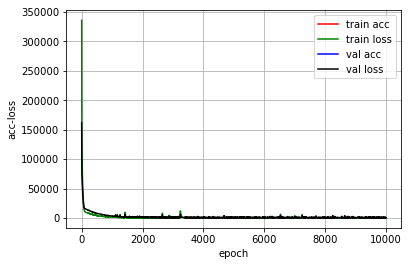

315/315 [==============================] - 0s 51us/step
593.719267927


In [60]:
history2 = LossHistory()
#采用编码层的网络结构，从新构成一个新的model，此model的参数跟原来autoencode的训练的参数一样。
out=Dense(200,activation='relu',activity_regularizer=regularizers.l1(0.01))(LR)
out=Dense(100,activation='sigmoid',activity_regularizer=regularizers.l1(0.01))(out)
out=Dense(20,activation='sigmoid',activity_regularizer=regularizers.l1(0.01))(out)
out=Dense(1,activation='relu',activity_regularizer=regularizers.l1(0.01))(out)
encoder=Model(inputs=input_img,outputs=out)
encoder.compile(optimizer='adam',loss='mse')
encoder.fit(X_train,y_train,epochs=10000,batch_size=100,validation_data=(X_test,y_test),shuffle=True,callbacks=[history2])
#score=encoder.evaluate(X_test,y_test)
#print(score)
print(encoder.summary())
history2.loss_plot('epoch')
encoder.save('SAE-DNN.model')
score=encoder.evaluate(X_test,y_test)
print(score)

In [61]:
model=keras.models.load_model('SAE-DNN.model')
pred=model.predict(X_test)
print(pred)

[[  32.22555542]
 [  38.35845566]
 [  45.40709686]
 [  50.43118286]
 [  50.53714752]
 [  53.5536232 ]
 [  51.11518478]
 [  52.40714264]
 [  60.7324028 ]
 [  62.04600143]
 [  61.29403687]
 [  61.12532425]
 [  53.70541   ]
 [  55.92053604]
 [  56.04697037]
 [  57.55313873]
 [  58.57022095]
 [  59.18490982]
 [  54.03082657]
 [  55.07949448]
 [  68.26917267]
 [  68.31056976]
 [  70.71308136]
 [  70.28076935]
 [  71.1314621 ]
 [  73.20974731]
 [  71.47983551]
 [  73.47168732]
 [  74.53856659]
 [  74.10269165]
 [  67.75262451]
 [  67.91387177]
 [  74.39043427]
 [  76.26861572]
 [  75.5817337 ]
 [  76.35897827]
 [  76.98412323]
 [  77.84152985]
 [  78.52856445]
 [  78.42034912]
 [  79.2738266 ]
 [  80.04985046]
 [  80.25201416]
 [  80.67403412]
 [  81.38587952]
 [  82.29178619]
 [  74.09727478]
 [  81.69068909]
 [  82.22266388]
 [  82.12815857]
 [  83.14366913]
 [  83.78153992]
 [  83.51831818]
 [  83.46974945]
 [  83.99106598]
 [  84.1677475 ]
 [  84.63144684]
 [  73.63130188]
 [  84.3861389